<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>SUMMER INTERNSHIP cum TRAINNING PROGRAMME</h3></br>
            <b>(Theme: Artificial Intelligence and Data Science)</b></center></td></tr>
</table>

<h1>Importing Necessary Libraries</h1>

In [1]:
import numpy as np #Numpy stands for Numerical Python. used for numerical Operations
import pandas as pd #Pandas is used for DataFrame/Database Operations
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

<h2> Reading a dataset</h2>

We'll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method & last 5 lines using the `tail` method:

In [2]:
df = pd.read_csv("telecom_churn.csv")

<h1> Understanding the dataset</h1>

In [3]:
df.head() #Read only first 5 rows from the dataset
#df.head(10) Read first 10 rows from the dataset

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
1                   26.0              161.6              123   
2                    NaN              243.4              114   
3                    NaN              299.4               71   
4                    0.0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
df.tail() #Read only last 5 rows from the dataset
#df.tail(10) Read only last 10 rows from the dataset

State  Account length  Area code International plan Voice mail plan  \
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                   36.0              156.2               77   
3329                    0.0              231.1               57   
3330                    0.0              180.8              109   
3331                    0.0              213.8              105   
3332                   25.0              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False

<details>
<summary>About printing DataFrames in Jupyter notebooks</summary></details>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>


Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types. `shape` method is used to get dimensions of the data.

In [5]:
print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using `columns`:

In [6]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3328 non-null   float64
 6   Total day minutes       3329 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the `Churn` feature to convert it into `int64`:

In [8]:
df["Churn"] = df["Churn"].astype("int64")

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [9]:
df.describe()

Account length  Area code  Number vmail messages  Total day minutes  \
count         3333.00    3333.00                3328.00            3329.00   
mean           101.06     437.18                   8.11             179.78   
std             39.82      42.37                  13.70              54.48   
min              1.00     408.00                   0.00               0.00   
25%             74.00     408.00                   0.00             143.70   
50%            101.00     415.00                   0.00             179.40   
75%            127.00     510.00                  20.00             216.40   
max            243.00     510.00                  51.00             350.80   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       Total eve charge  Total night minutes  Total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       Total night charge  Total intl minutes  Total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       Total intl charge  Customer service calls    Churn  
count            3333.00                 3333.00  3333.00  
mean                2.76                    1.56     0.14  
std                 0.75                    1.32     0.35  
min                 0.00                    0.00     0.00  
25%                 2.30                    1.00     0.00  
50%                 2.78                    1.00     0.00  
75%                 3.27                    2.00     0.00  
max                 5.40                    9.00     1.00

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [10]:
df.describe(include=["object", "bool"])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [11]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [12]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

<h2>Check for Missing Values</h2>

Generally `isnull()`,`notnull()`,`info()`,`isna()` method is used along with the dataframe for checking any missing values. The `sum()` is used to see how many missing values in each column.

In [13]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     5
Total day minutes         4
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Here we can see one value in `Number vmail messages` and one value in `Total day minutes` is missing.

There are two stratergies for handling **missing values**.
<ol type='a'>
    <li><b>Removing Rows with Missing Values</b>
        <li><b>Imputation Methods</b>

**Simple Imputation:**
            
<ol>
    <li><b>Mean/Median/Mode Imputation:</b> Replace missing values with the mean, median, or mode of the respective column.
<li><b>Constant Value Imputation:</b> Replace missing values with a constant value (e.g., 0, -1, or any other value).
<li><b>Forward and Backward Fill:</b> Replace missing values with the previous or next non-missing value in the same variable.
</ol>

**Advanced Imputation:**
            
<ol>
<li><b>Interpolation:</b> Impute missing values based on interpolation methods like linear, time-series, or index-based interpolation.
<li><b>Iterative Imputer:</b> Iteratively impute missing values based on the values of other features.
<li><b>KNN Imputer:</b> Impute missing values based on the k-nearest neighbors algorithm.
<li><b>Regression Imputer:</b> Impute missing values based on a regression model trained on the non-missing data.
</ol>

**Other Advanced Techniques:**
            
<ol>
<li><b>Multiple Imputation:</b> Create multiple imputed datasets and combine the results to account for the uncertainty of missing values.
<li><b>Deep Learning-based Imputation:</b> Use deep learning models like autoencoders or generative adversarial networks (GANs) for imputing missing values.
</ol>

In [14]:
df['Number vmail messages'] = df['Number vmail messages'].fillna(method='ffill')
df['Total day minutes'] = df['Total day minutes'].fillna(method='ffill')
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


<h2> Sorting</h2>

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [15]:
df.sort_values(by="Total day charge", ascending=False).head()

State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                     0.0              350.8               75   
985                     0.0              346.8               55   
2594                    0.0              345.3               81   
156                     0.0              337.4              120   
605                     0.0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   

      Customer service calls  Churn  
365                        1      1  
985                        1      1  
2594                       1      1  
156                        0      1  
605                        2      1

We can also sort by multiple columns:

In [16]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                    21.0              315.6              105   
2259                   31.0              313.8               87   
534                     0.0              310.4               97   
575                    36.0              309.9               90   
2858                   28.0              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3      0  
2259                       3      0  
534                        4      0  
575                        1      0  
2858                       1      0

<h2>Indexing and retrieving data</h2>

A DataFrame can be indexed in a few different ways.

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [17]:
df["Churn"].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column.

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [18]:
df[df["Churn"] == 1.0]

State  Account length  Area code International plan Voice mail plan  \
10      IN              65        415                 No              No   
15      NY             161        415                 No              No   
21      CO              77        408                 No              No   
33      AZ              12        408                 No              No   
41      MD             135        408                Yes             Yes   
...    ...             ...        ...                ...             ...   
3301    CA              84        415                 No              No   
3304    IL              71        510                Yes              No   
3320    GA             122        510                Yes              No   
3322    MD              62        408                 No              No   
3323    IN             117        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
10                      0.0              129.1              137   
15                      0.0              332.9               67   
21                      0.0               62.4               89   
33                      0.0              249.6              118   
41                     41.0              173.1               85   
...                     ...                ...              ...   
3301                    0.0              280.0              113   
3304                    0.0              186.1              114   
3320                    0.0              140.0              101   
3322                    0.0              321.1              105   
3323                    0.0              118.4              126   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
10               21.95              228.5               83             19.42   
15               56.59              317.8               97             27.01   
21               10.61              169.9              121             14.44   
33               42.43              252.4              119             21.45   
41               29.43              203.9              107             17.33   
...                ...                ...              ...               ...   
3301             47.60              202.2               90             17.19   
3304             31.64              198.6              140             16.88   
3320             23.80              196.4               77             16.69   
3322             54.59              265.5              122             22.57   
3323             20.13              249.3               97             21.19   

      Total night minutes  Total night calls  Total night charge  \
10                  208.8                111                9.40   
15                  160.6                128                7.23   
21                  209.6                 64                9.43   
33                  280.2                 90               12.61   
41                  122.2                 78                5.50   
...                   ...                ...                 ...   
3301                156.8                103                7.06   
3304                206.5                 80                9.29   
3320                120.1                133                5.40   
3322                180.5                 72                8.12   
3323                227.0                 56               10.22   

      Total intl minutes  Total intl calls  Total intl charge  \
10                  12.7                 6               3.43   
15                   5.4                 9               1.46   
21                   5.7                 6               1.54   
33                  11.8                 3               3.19   
41                  14.6                15               3.94   
...                  ...               ...                ...   
3301                10.4                 4            

In [19]:
df[df["Churn"] == 1].select_dtypes(include=['number']).mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [20]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [21]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [22]:
df.loc[0:5, "State":"Area code"]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [23]:
df.iloc[0:5, 0:3]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [24]:
df[-1:]

State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                   25.0              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [25]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages      51.0
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [26]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

State  Account length  Area code International plan Voice mail plan  \
9     WV             141        415                Yes             Yes   
26    WY              57        408                 No             Yes   
44    WI              64        510                 No              No   
49    WY              97        415                 No             Yes   
54    WY              87        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
9                    37.0              258.6               84   
26                   39.0              213.0              115   
44                    0.0              154.0               67   
49                   24.0              133.2              135   
54                    0.0              151.0               83   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9              43.96              222.0              111             18.87   
26             36.21              191.1              112             16.24   
44             26.18              225.8              118             19.19   
49             22.64              217.2               58             18.46   
54             25.67              219.7              116             18.67   

    Total night minutes  Total night calls  Total night charge  \
9                 326.4                 97               14.69   
26                182.7                115                8.22   
44                265.3                 86               11.94   
49                 70.6                 79                3.18   
54                203.9                127                9.18   

    Total intl minutes  Total intl calls  Total intl charge  \
9                 11.2                 5               3.02   
26                 9.5                 3               2.57   
44                 3.5                 3               0.95   
49                11.0                 3               2.97   
54                 9.7                 3               2.62   

    Customer service calls  Churn  
9                        0      0  
26                       0      0  
44                       1      0  
49                       1      0  
54                       5      1

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument: The **International plan** and **Voice mail plan** values are changed from `Yes` or `No` to `True` or `False`

In [27]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
1                   26.0              161.6              123   
2                   26.0              243.4              114   
3                   26.0              299.4               71   
4                    0.0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

The same thing can be done with the `replace` method:

In [28]:
df = df.replace({"Voice mail plan": d})
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
1                   26.0              161.6              123   
2                   26.0              243.4              114   
3                   26.0              299.4               71   
4                    0.0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [29]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                  Total eve minutes  \
                  count    mean   std  min    50%    max             count   
Churn                                                                        
0                2850.0  175.23  50.2  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.0  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [30]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                   Total eve minutes               \
                   mean   std  min    max              mean    std   min   
Churn                                                                      
0                175.23  50.2  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.0  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [31]:
pd.crosstab(df["Churn"], df["International plan"])

International plan  False  True 
Churn                           
0                    2664    186
1                     346    137

In [32]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan  False  True 
Churn                        
0                 0.60   0.25
1                 0.12   0.02

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [33]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

Total day calls  Total eve calls  Total night calls
Area code                                                     
408                 100.50            99.79              99.04
415                 100.58           100.50             100.40
510                 100.10            99.67             100.60


### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:



In [34]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
1                   26.0              161.6              123   
2                   26.0              243.4              114   
3                   26.0              299.4               71   
4                    0.0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total calls  
0                       1      0          303  
1                       1      0          332  
2                       0      0          333  
3                       2      0          255  
4                       3      0          359  

[5 rows x 21 columns]

It is possible to add a column more easily without creating an intermediate Series instance:

In [35]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
1                   26.0              161.6              123   
2                   26.0              243.4              114   
3                   26.0              299.4               71   
4                    0.0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  ...                254.4   
2             41.38              121.2  ...                162.6   
3             50.90               61.9  ...                196.9   
4             28.34              148.3  ...                186.9   

   Total night calls  Total night charge  Total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   Total calls  Total charge  
0          303         75.56  
1          332         59.24  
2          333         62.29  
3          255         66.80  
4          359         52.09  

[5 rows x 22 columns]

To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [36]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
3    OH              84        408                True            False   
4    OK              75        415                True            False   
5    AL             118        510                True            False   
6    MA             121        510               False             True   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1              110   
3                   26.0              299.4               71   
4                    0.0              166.7              113   
5                    0.0              166.7               98   
6                   24.0              218.2               88   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   

   Customer service calls  Churn  
0                       1      0  
3                       2      0  
4                       3      0  
5                       0      0  
6                       3      0

Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table

In [37]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

<h1> Visualizing the Data</h1>

We'll do this using visual analysis with `matplotlib` and `Seaborn`.


In [38]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


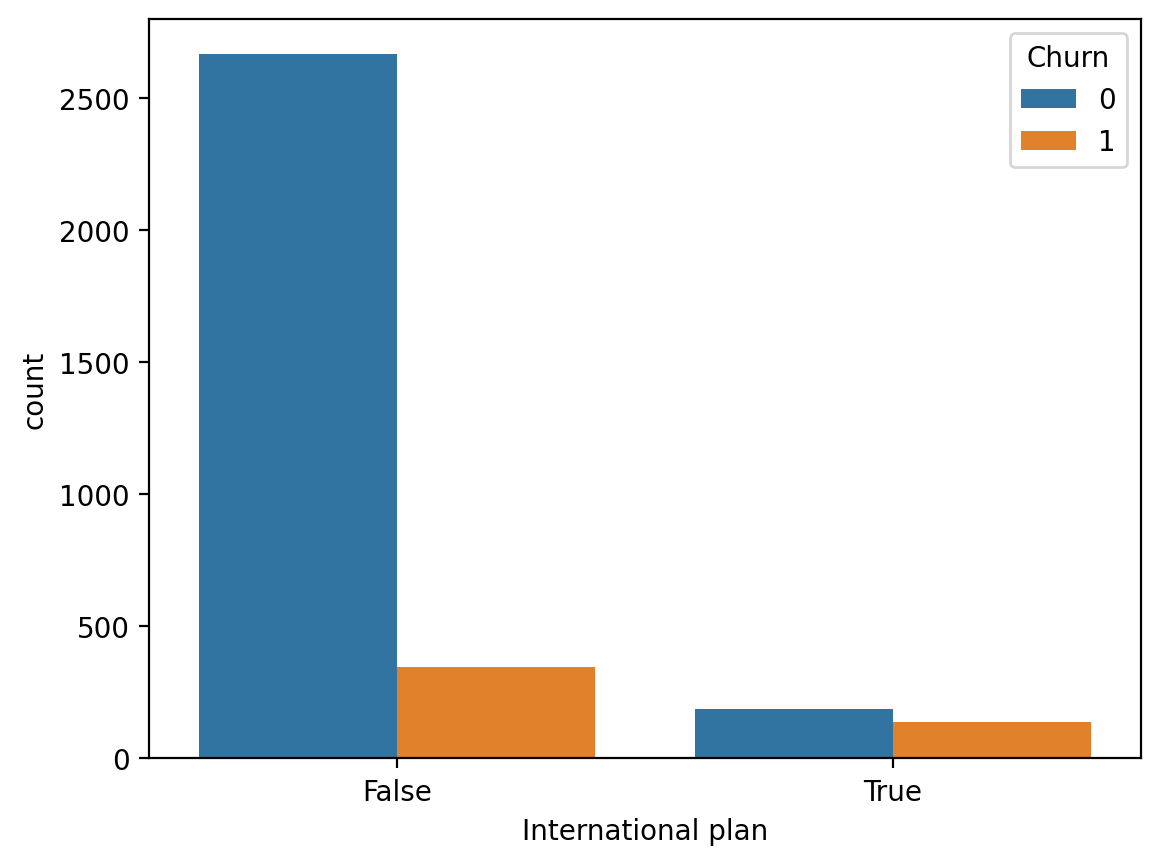

In [39]:
sns.countplot(x="International plan", hue="Churn", data=df.astype(str));


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [40]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

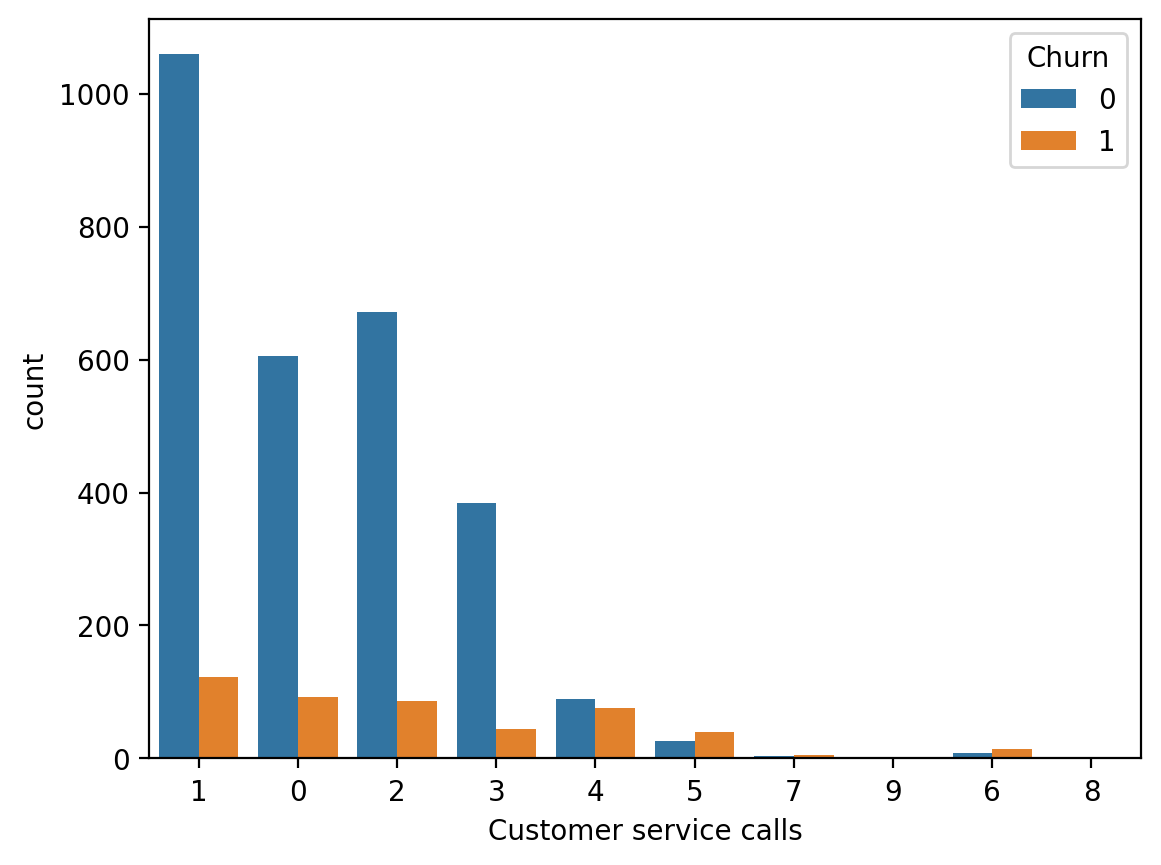

In [41]:
sns.countplot(x="Customer service calls", hue="Churn", data=df.astype(str));

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn.

In [42]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

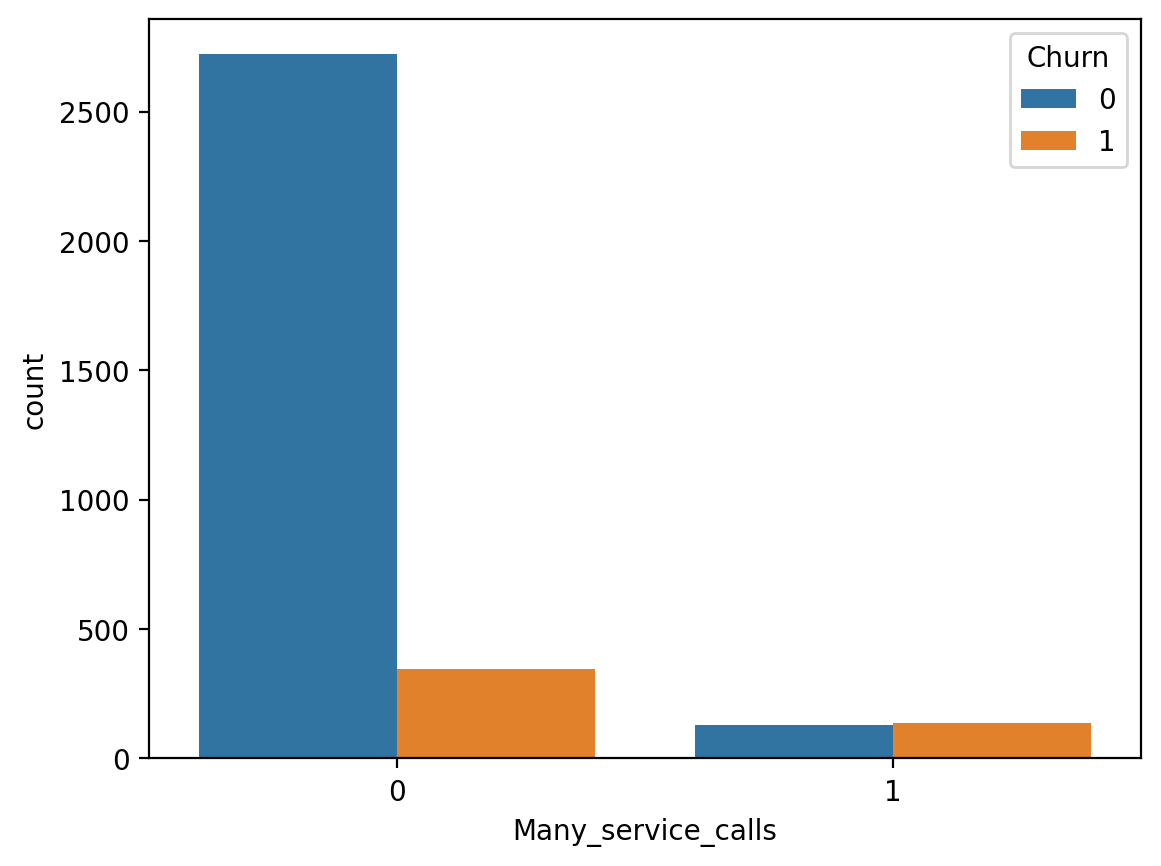

In [43]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df.astype(str));


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [44]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn     0    1
row_0           
False  2841  464
True      9   19

<h2> Univariate visualization</h2>

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

<h3> Quantitative features </h3>

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

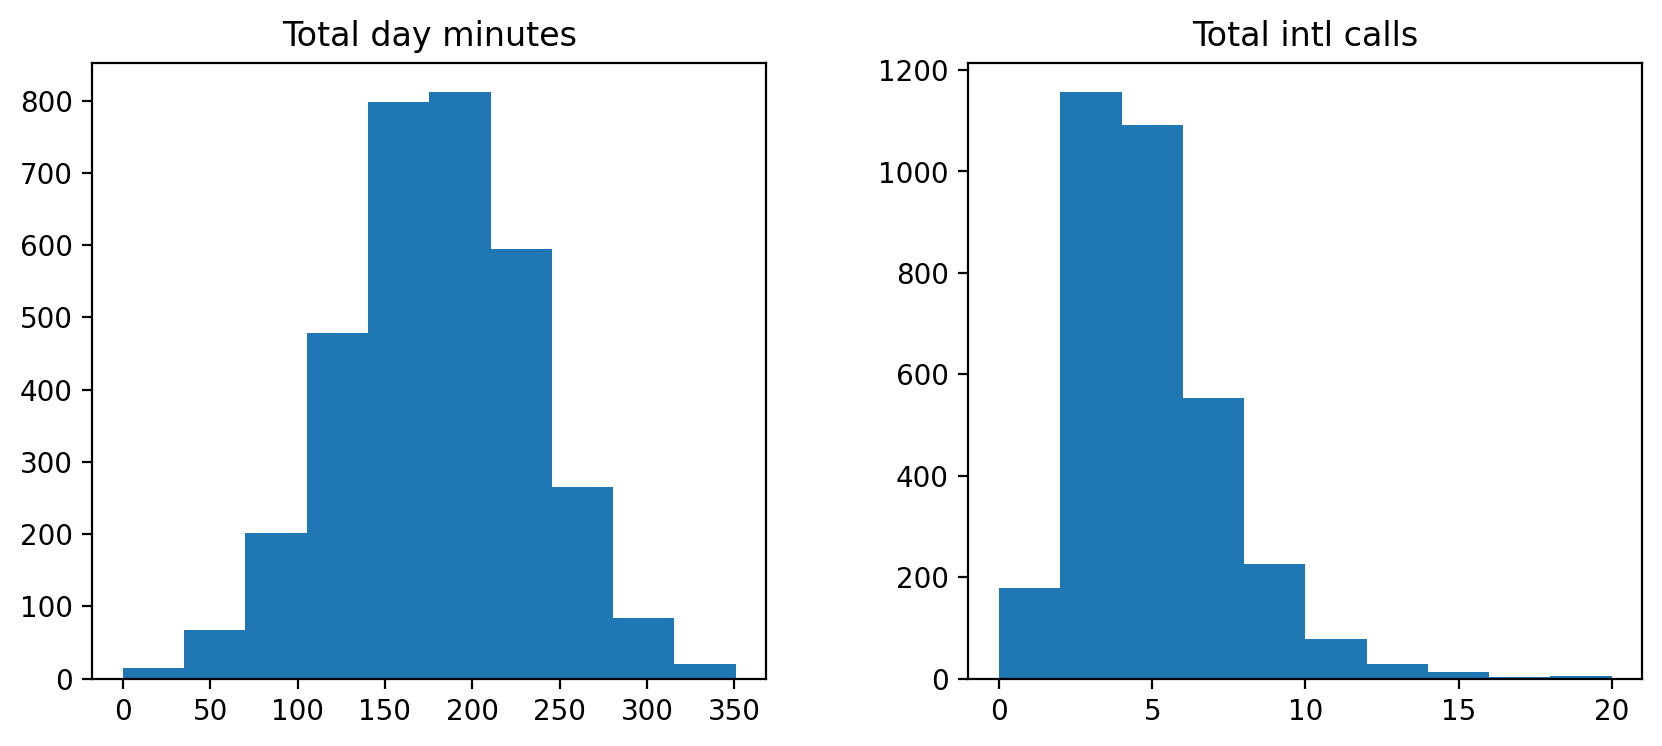

In [45]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4),grid=False);

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

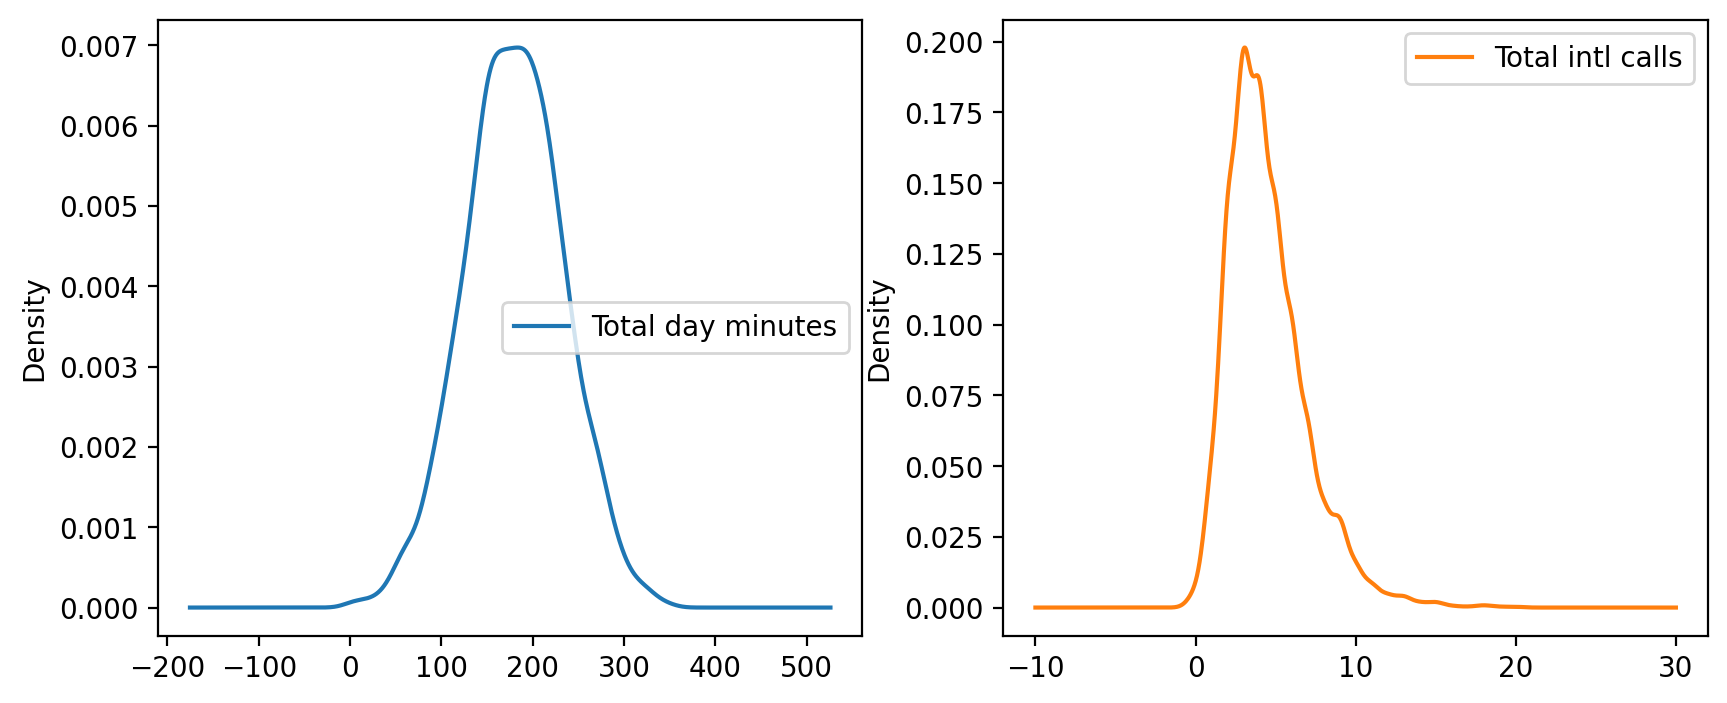

In [46]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

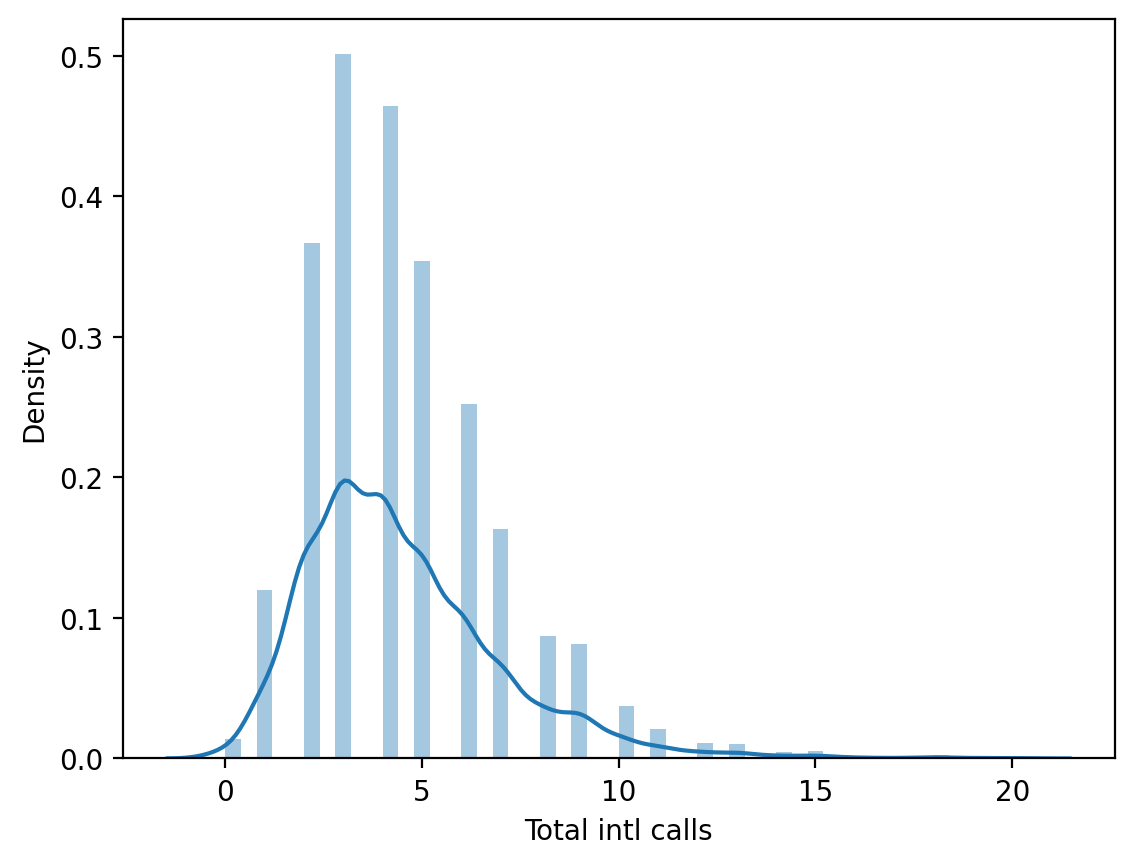

In [47]:
sns.distplot(df["Total intl calls"]);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

##### Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

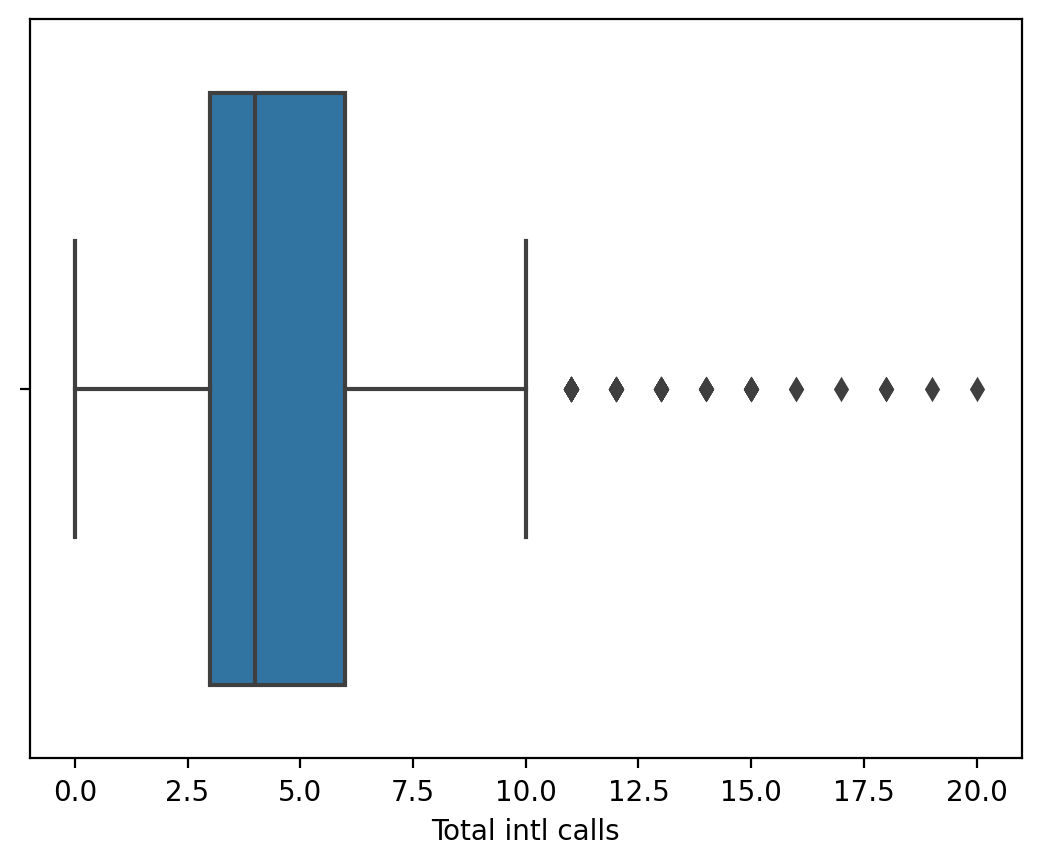

In [48]:
sns.boxplot(x="Total intl calls", data=df);

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

##### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

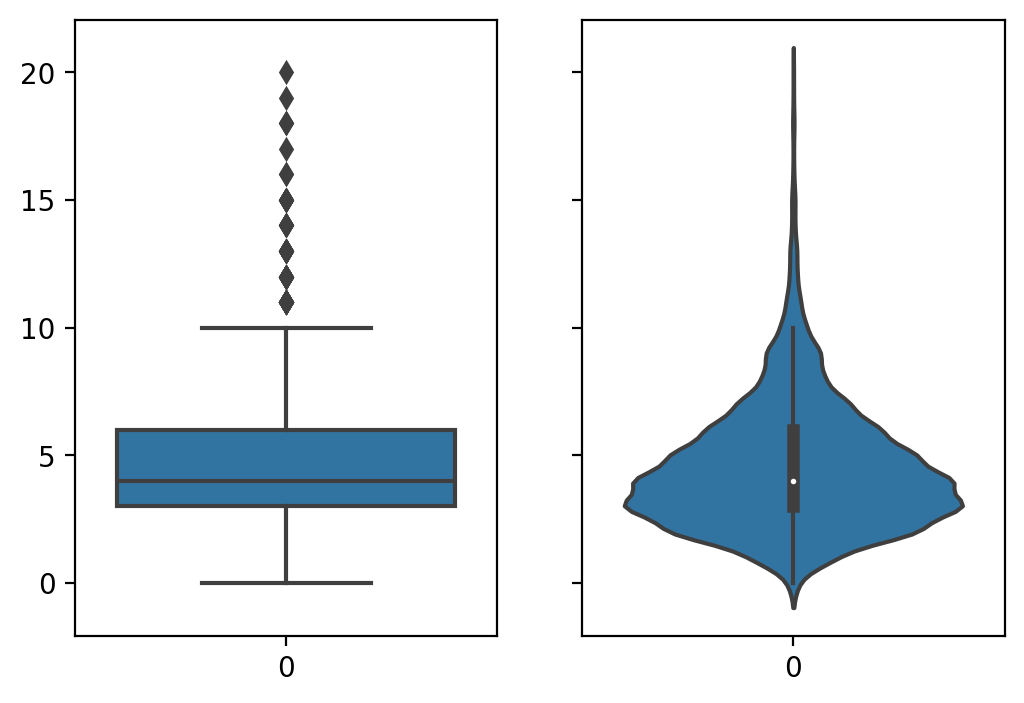

In [49]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

##### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

In [50]:
df[features].describe()

Total day minutes  Total intl calls
count            3333.00           3333.00
mean              179.82              4.48
std                54.48              2.46
min                 0.00              0.00
25%               143.70              3.00
50%               179.40              4.00
75%               216.60              6.00
max               350.80             20.00

Its output is mostly self-explanatory. *25%*, *50%* and *75%* are the corresponding [percentiles](https://en.wikipedia.org/wiki/Percentile).

<h4>Categorical and binary features</h4>

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### Frequency table

Let's check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [51]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority "Churn" class.

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

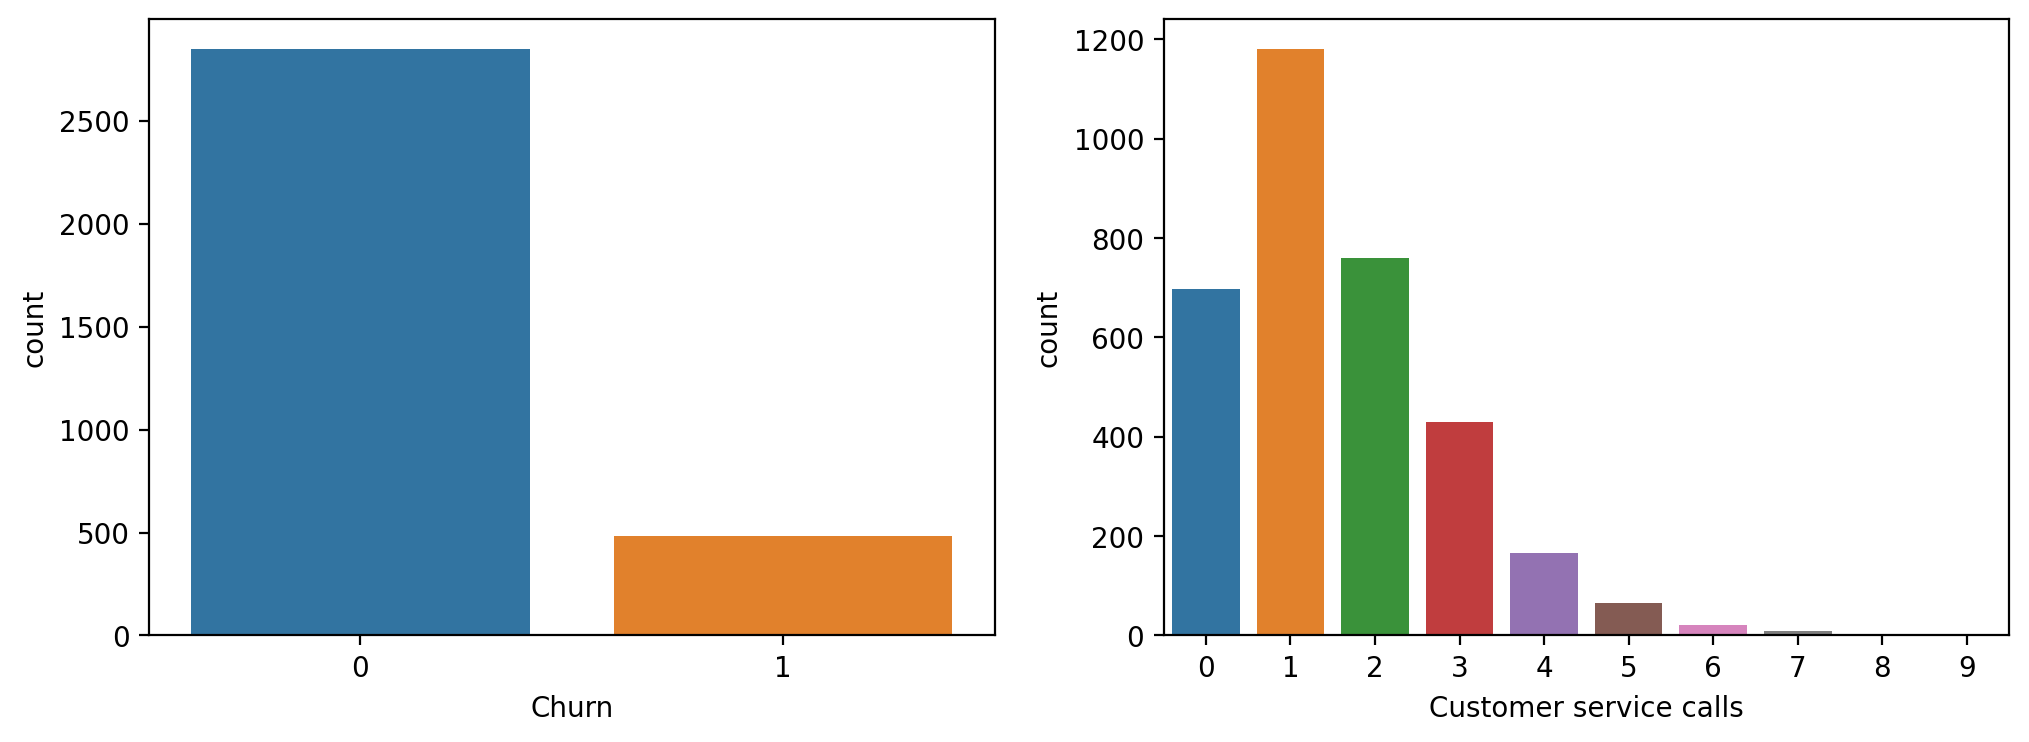

In [52]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

<h2>Multivariate visualization</h2>

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

<h3>Quantitative vs. Quantitative</h3>

##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

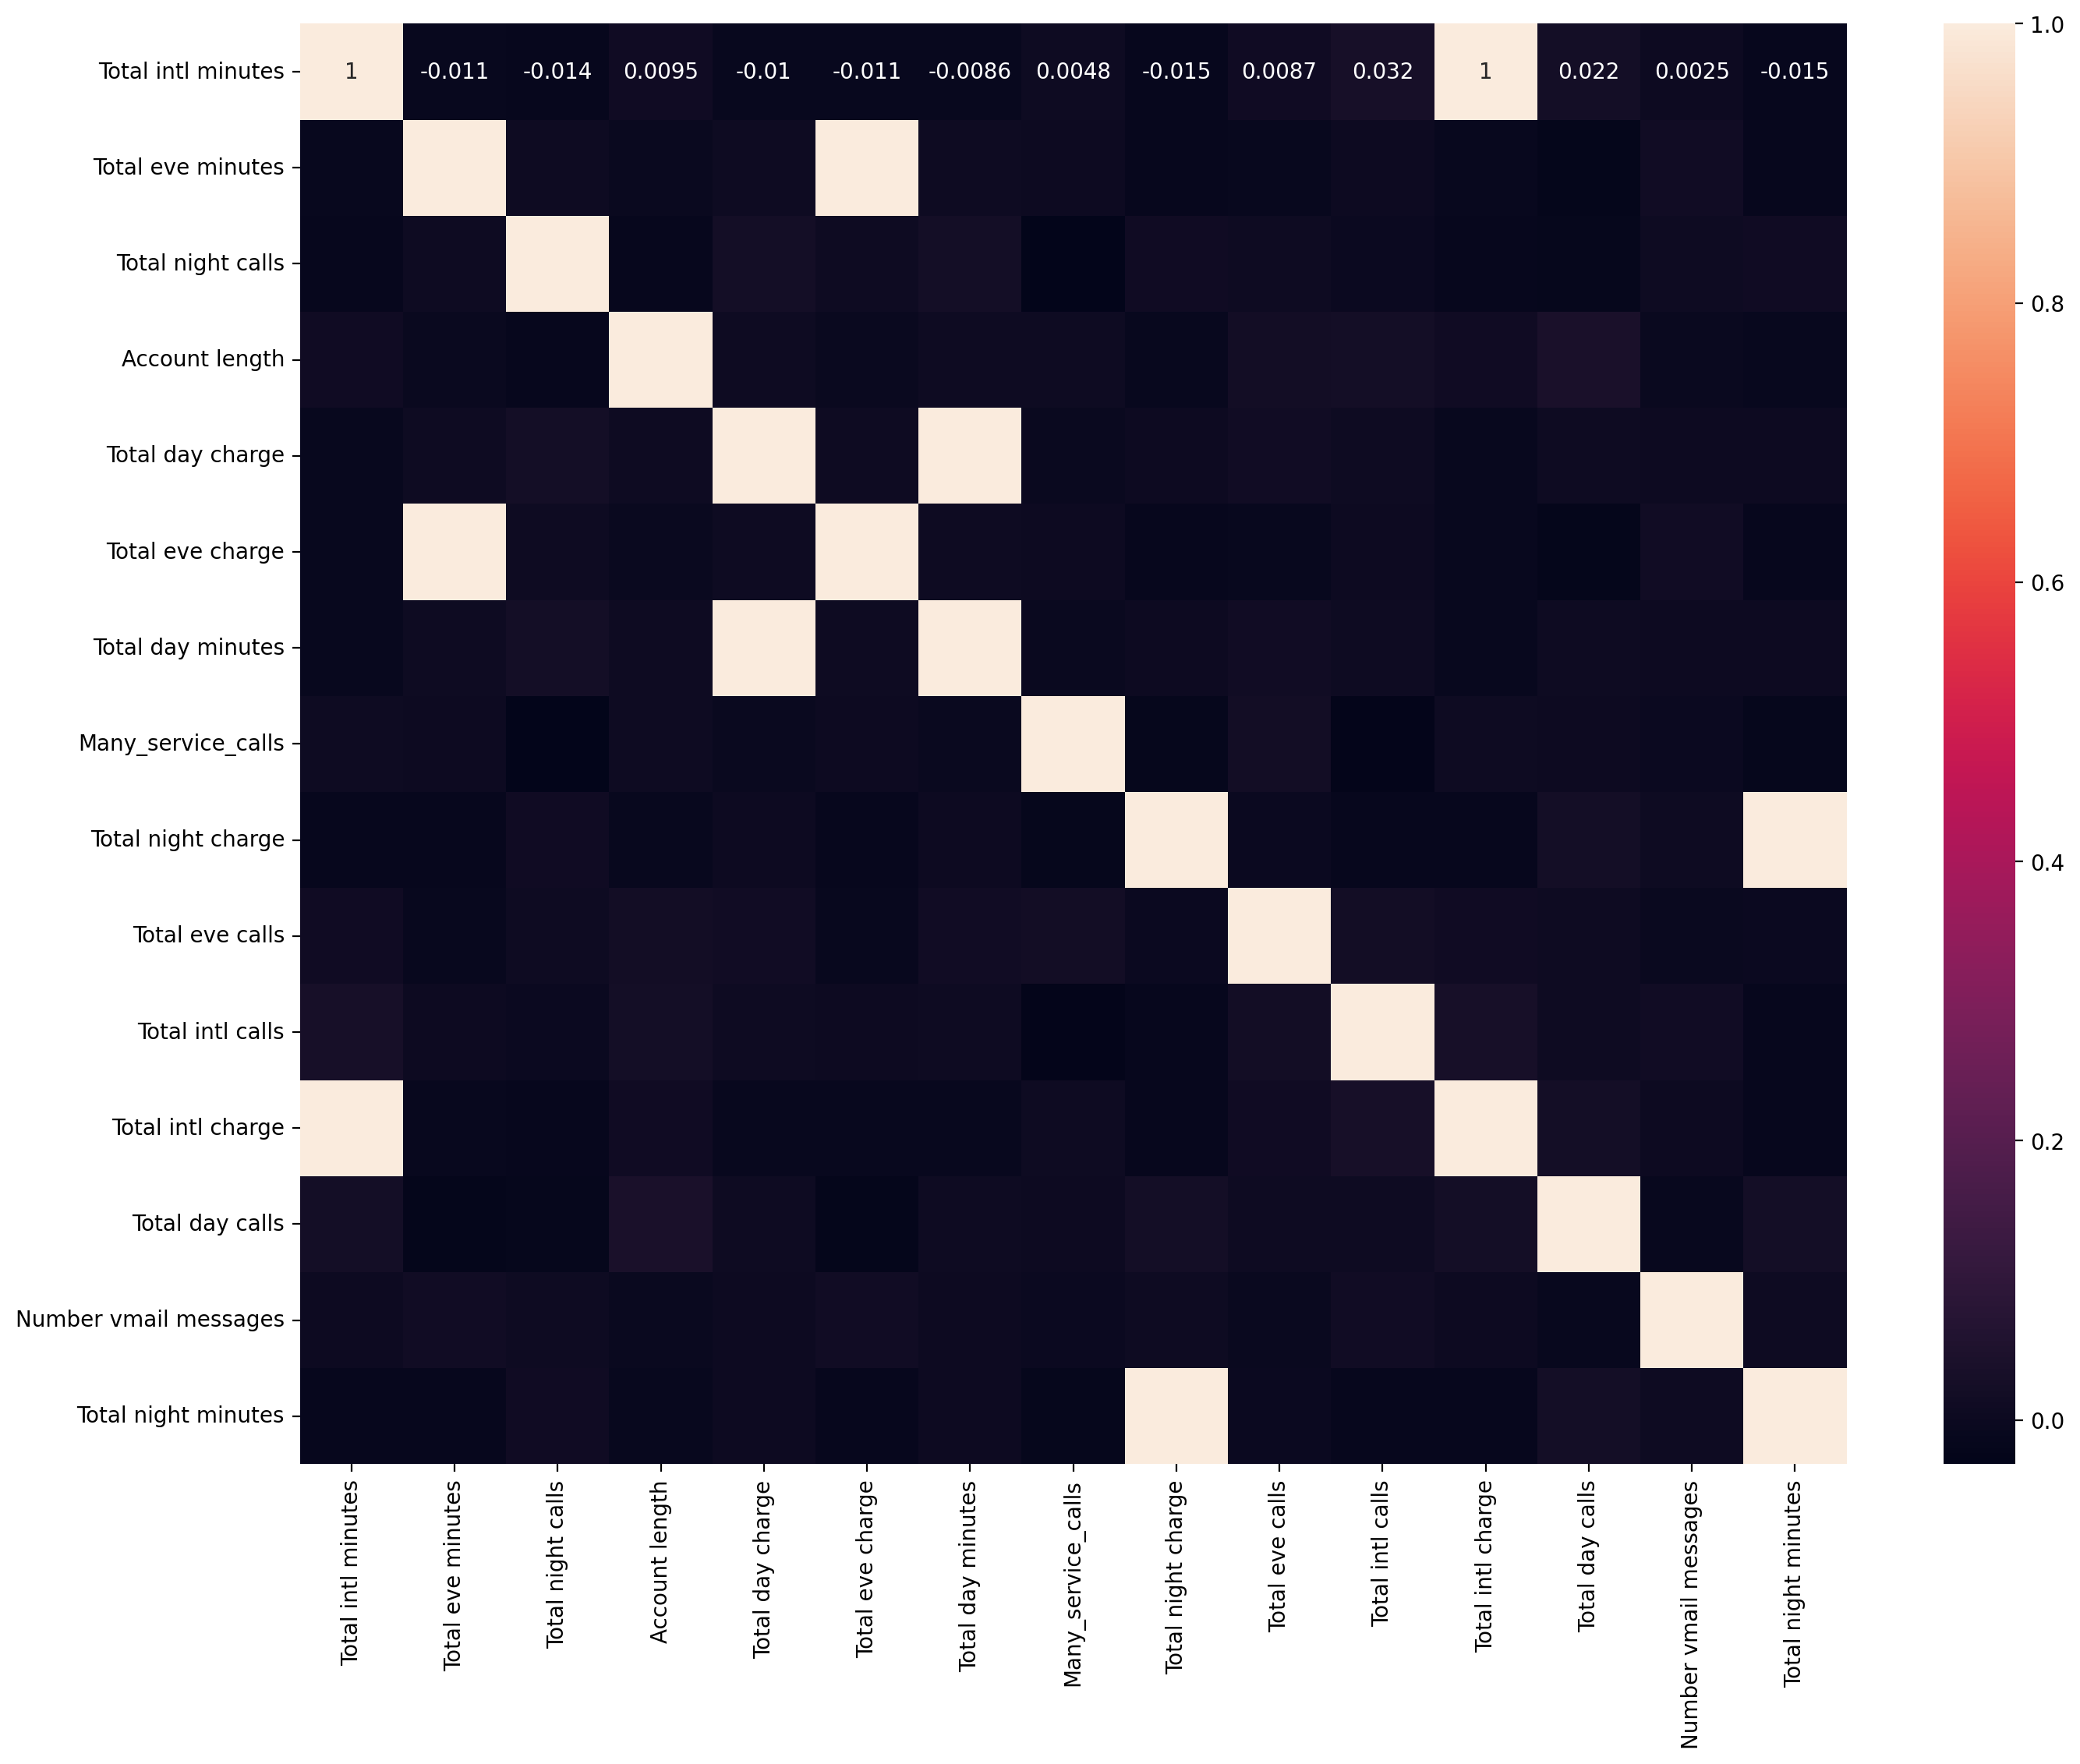

In [53]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)
# Calculate and plot
corr_matrix = df[numerical].corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [54]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

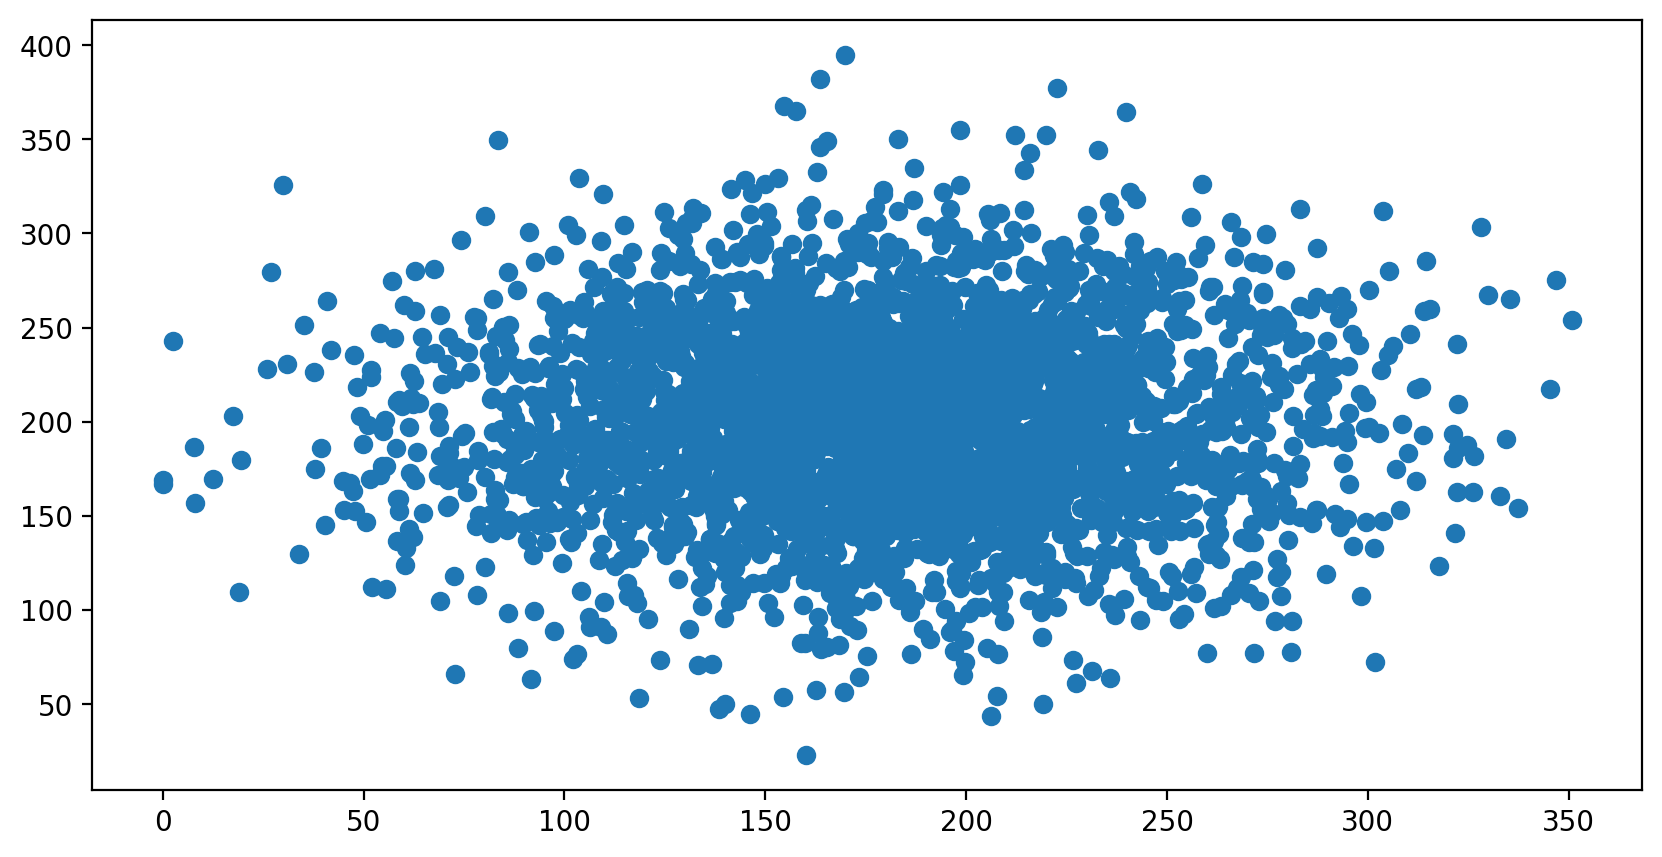

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(df["Total day minutes"], df["Total night minutes"]);
plt.show()

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

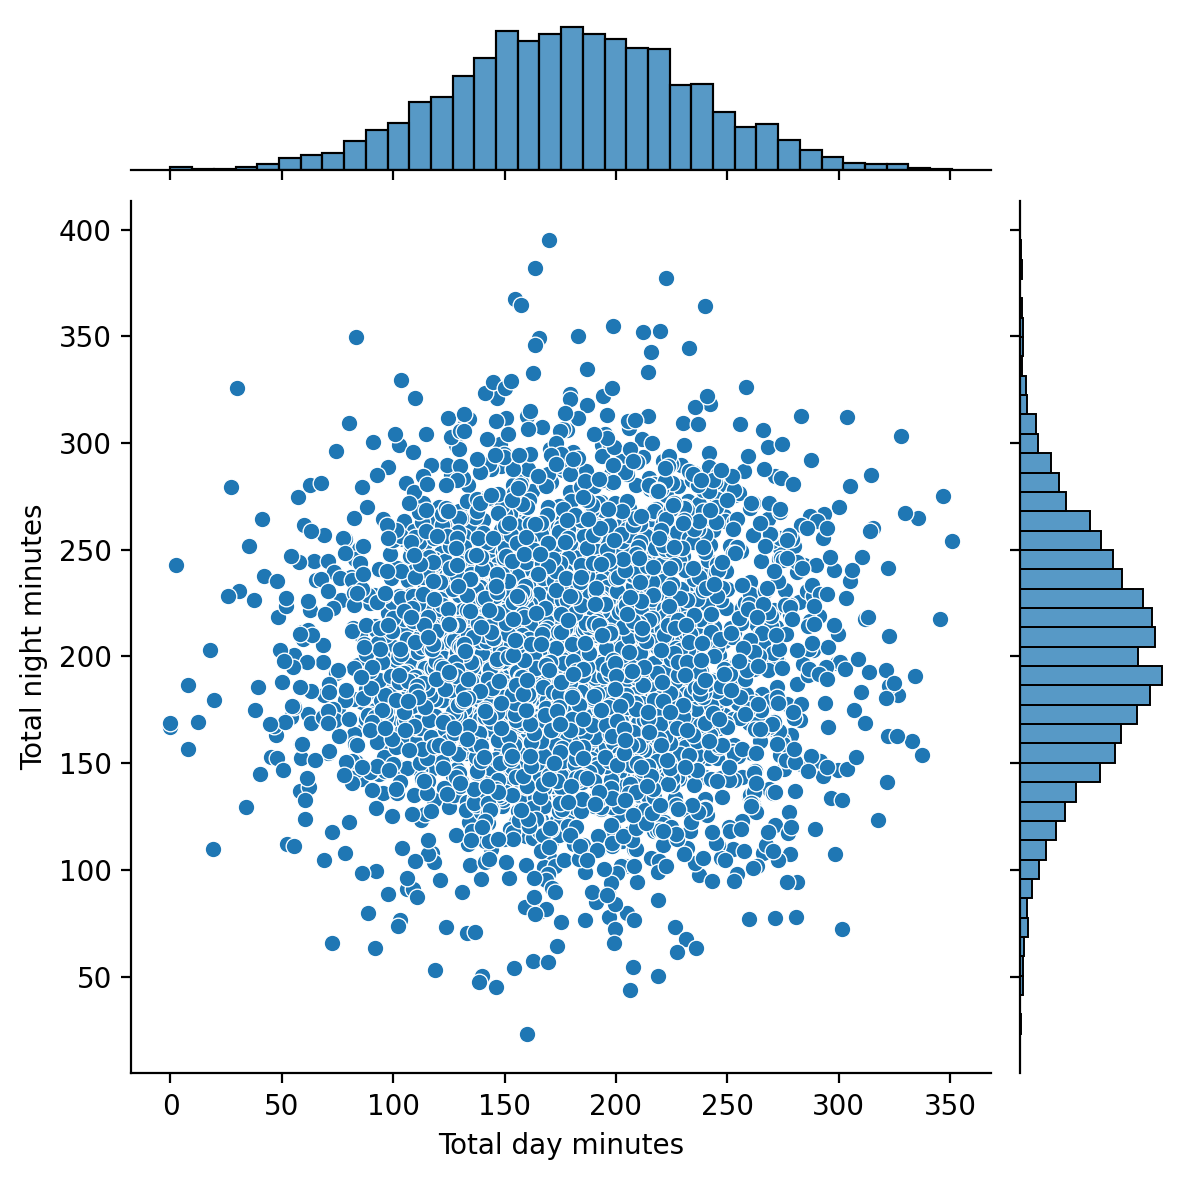

In [56]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

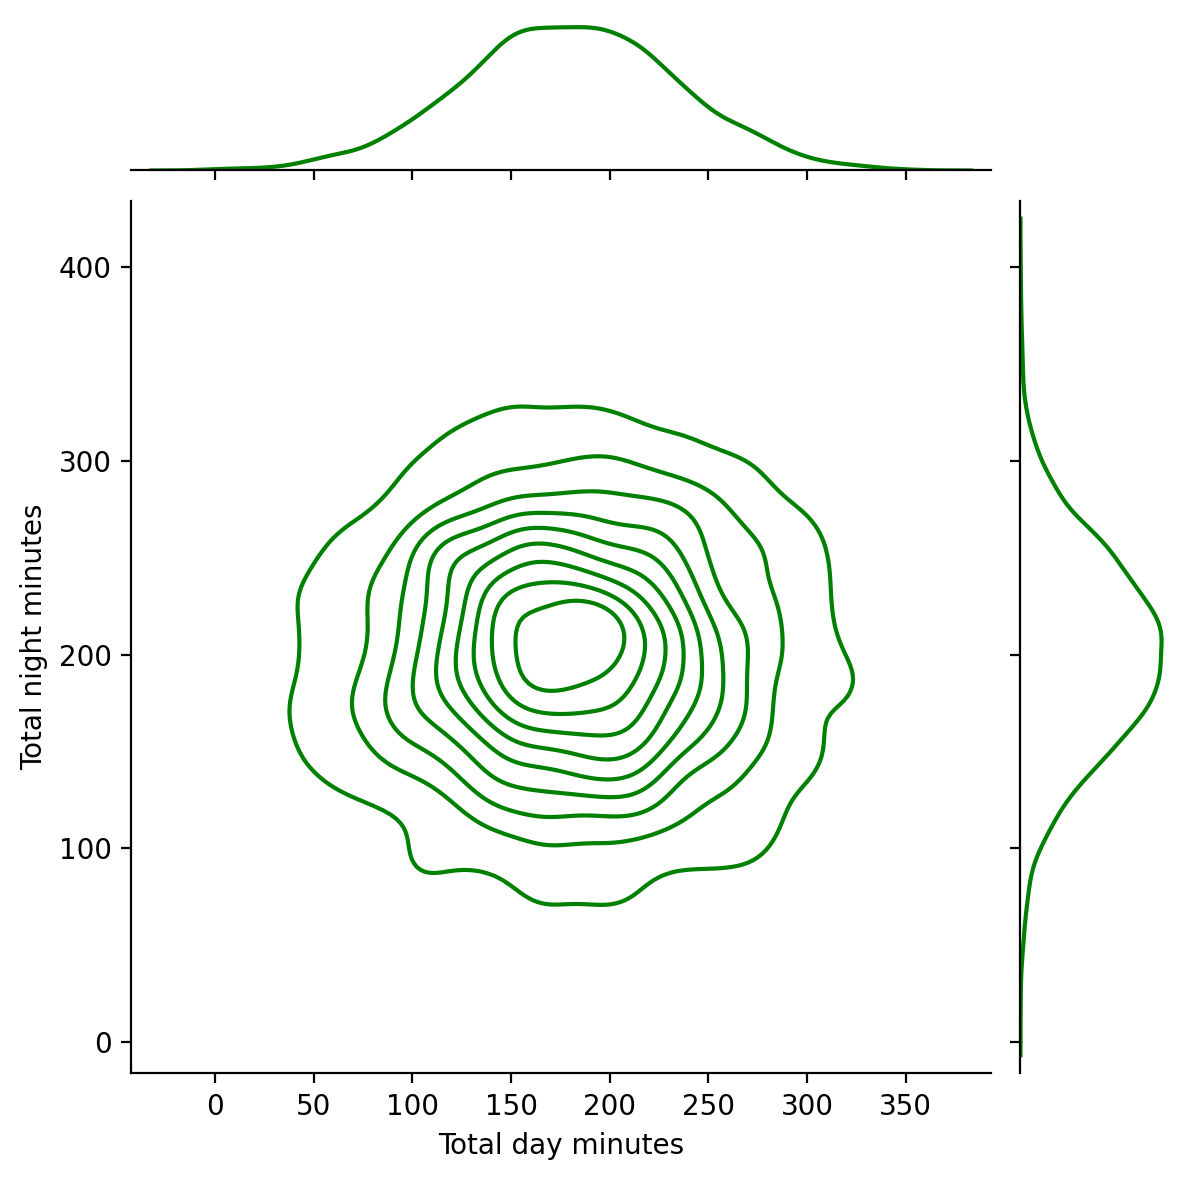

In [57]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g")
plt.show()

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

# `pairplot()` may become very slow with the SVG or retina format

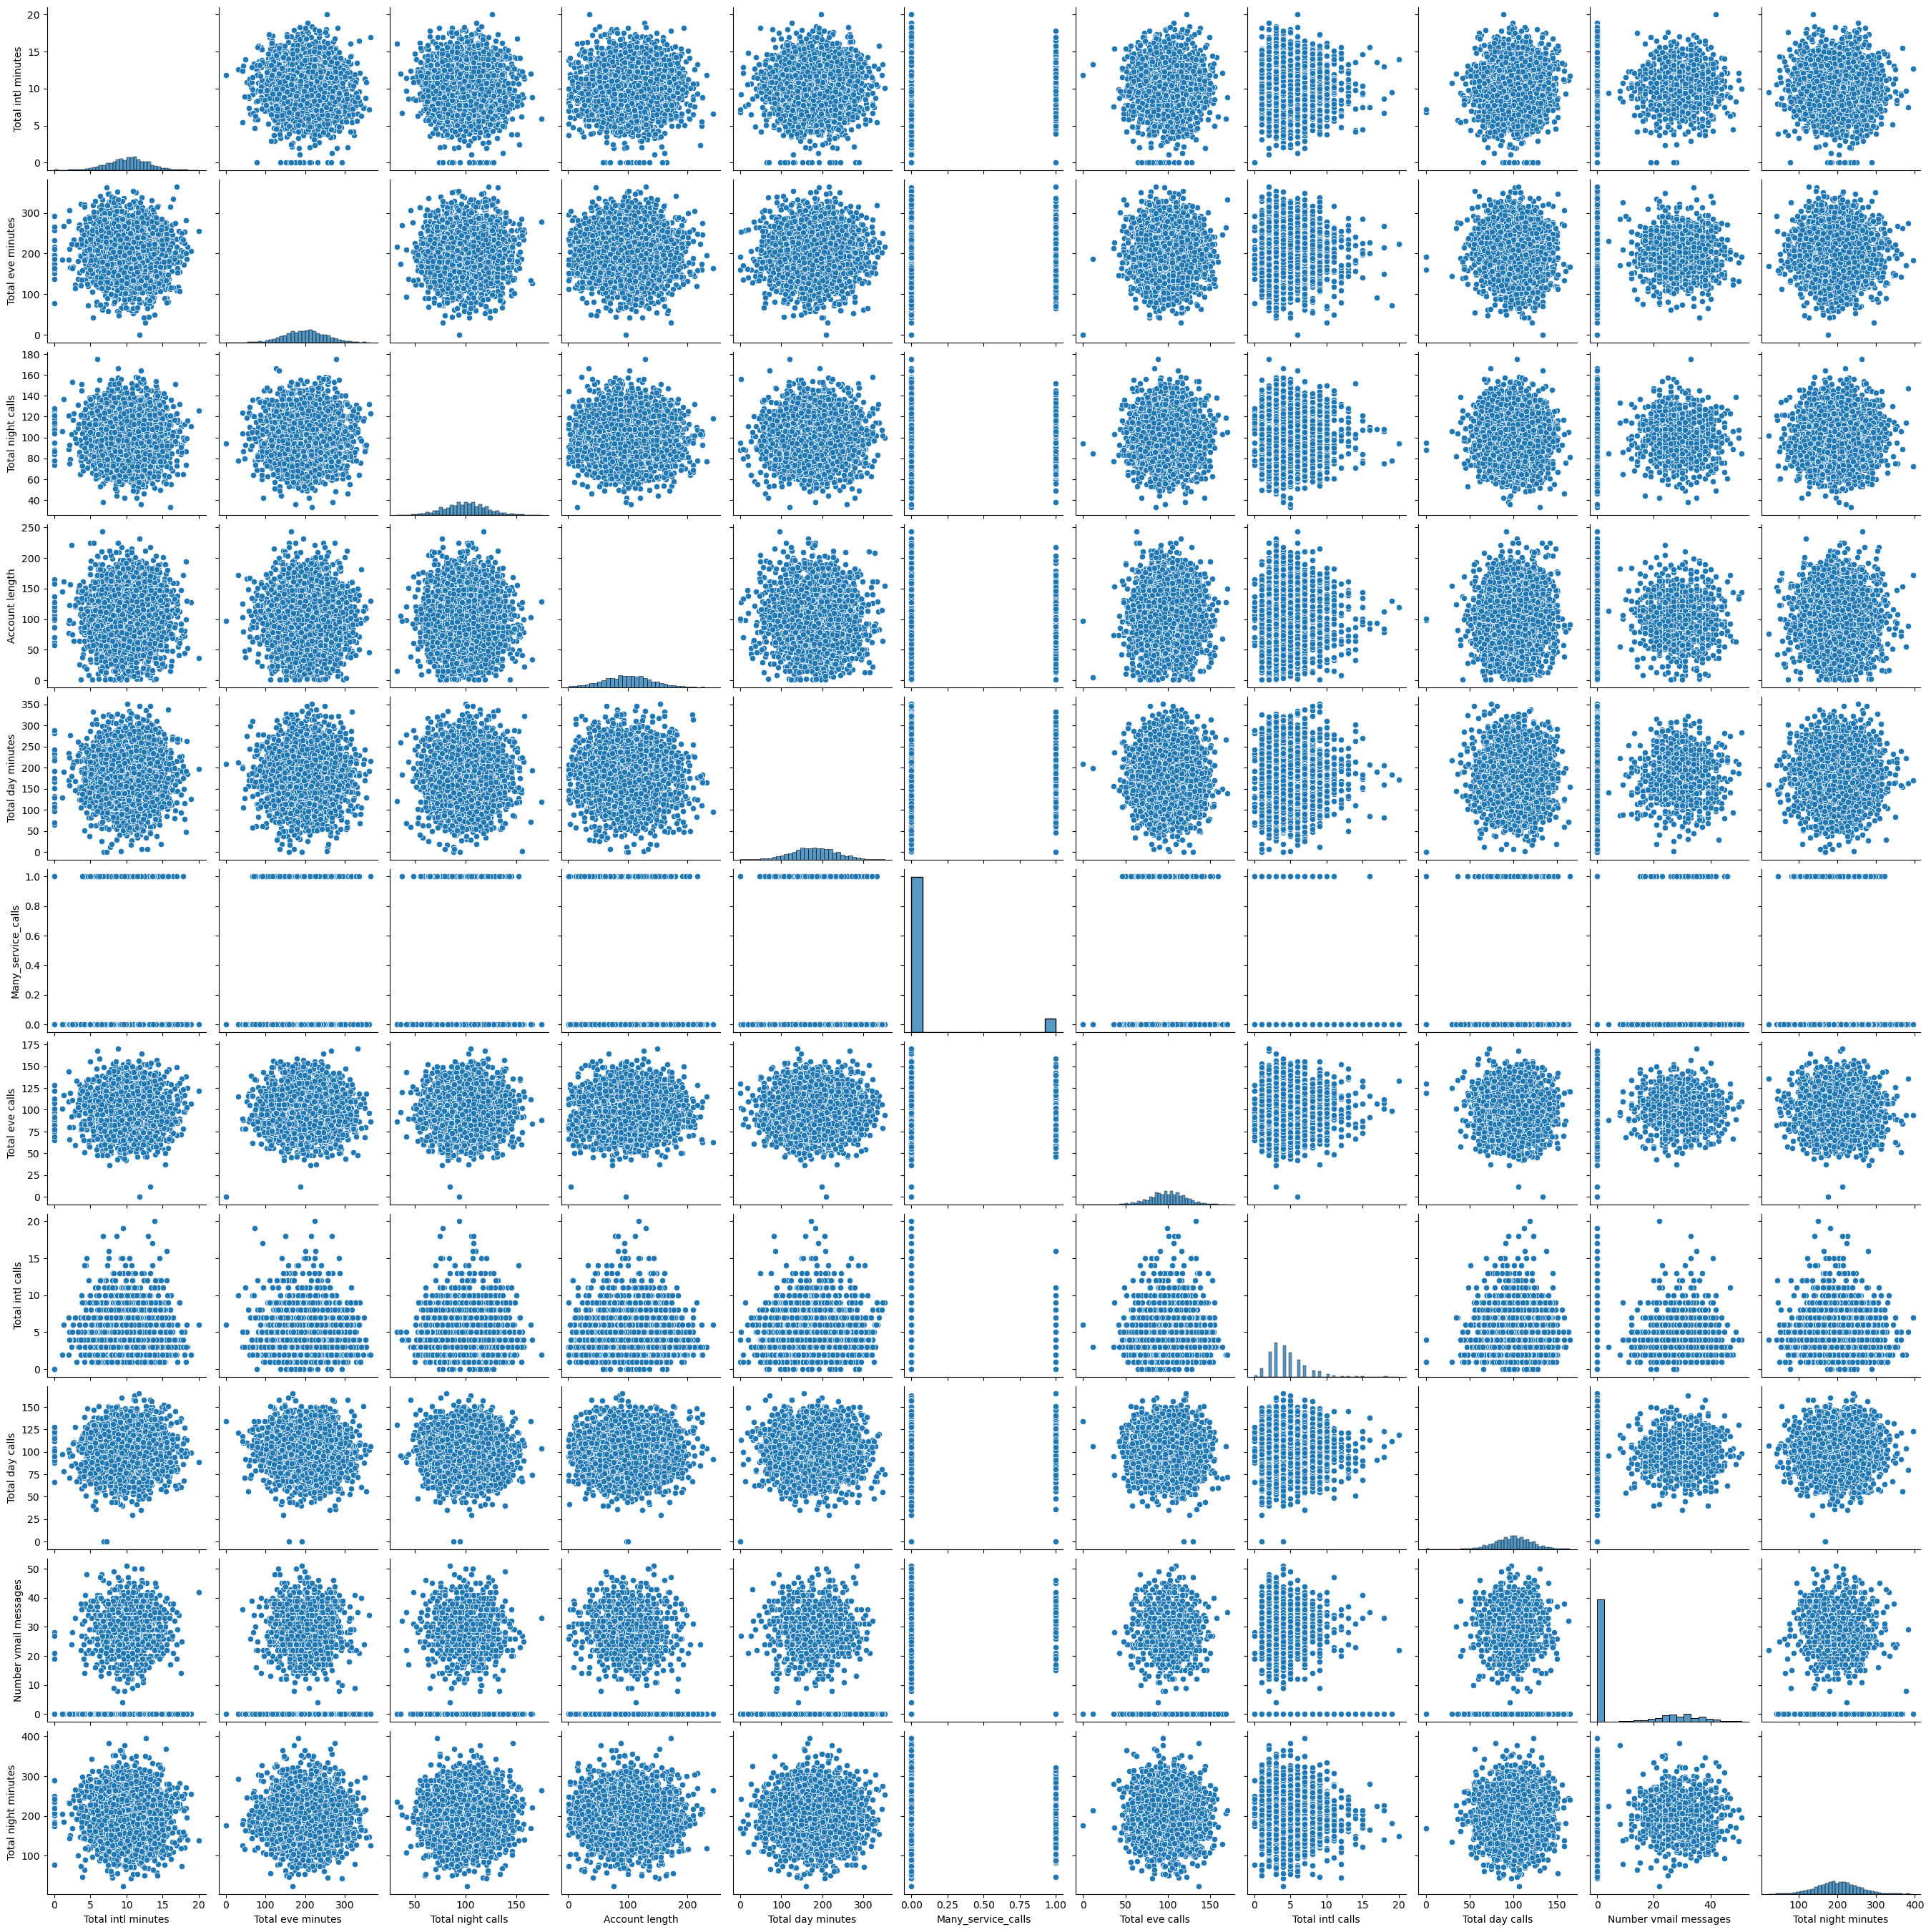

In [58]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [59]:
%config InlineBackend.figure_format = 'retina'

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

<h2>Quantitative vs. Categorical</h2>

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter `hue` to indicate our categorical feature of interest:

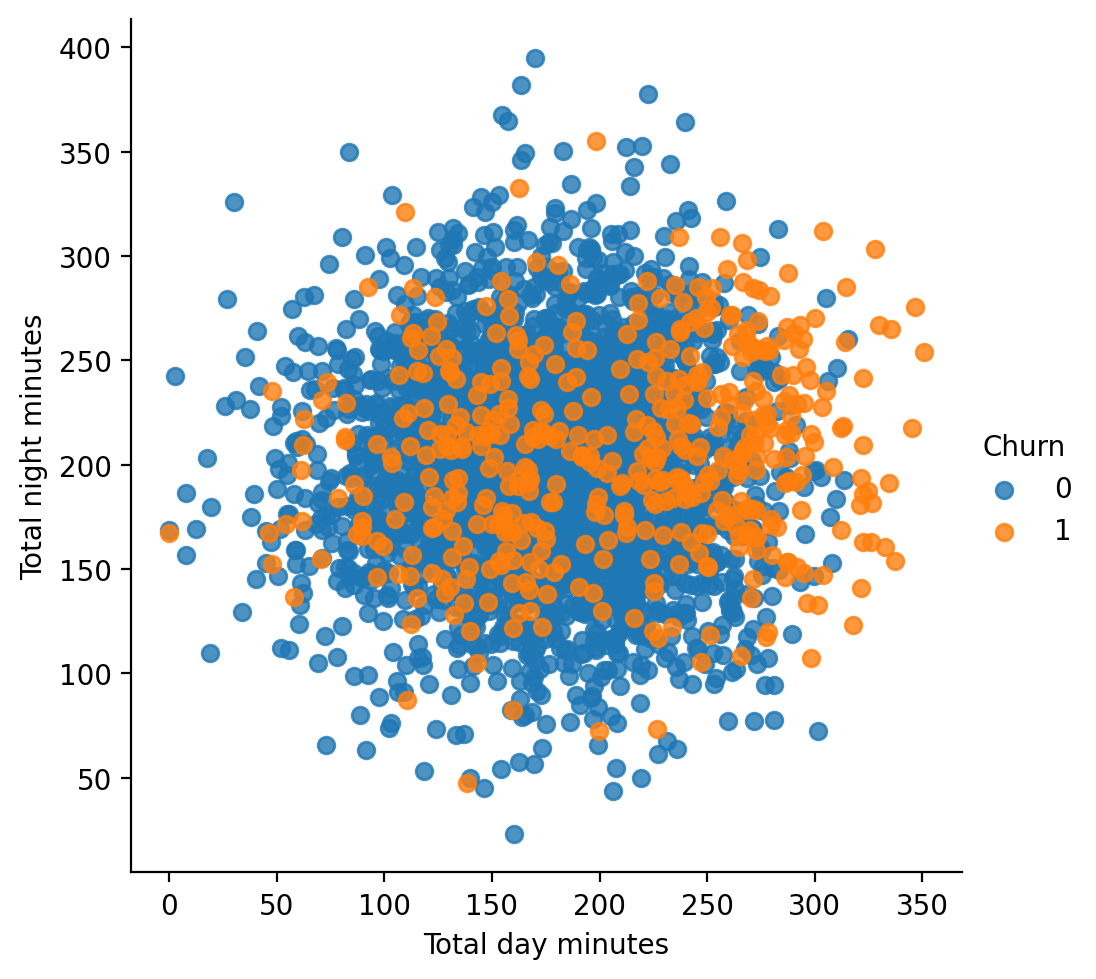

In [60]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).

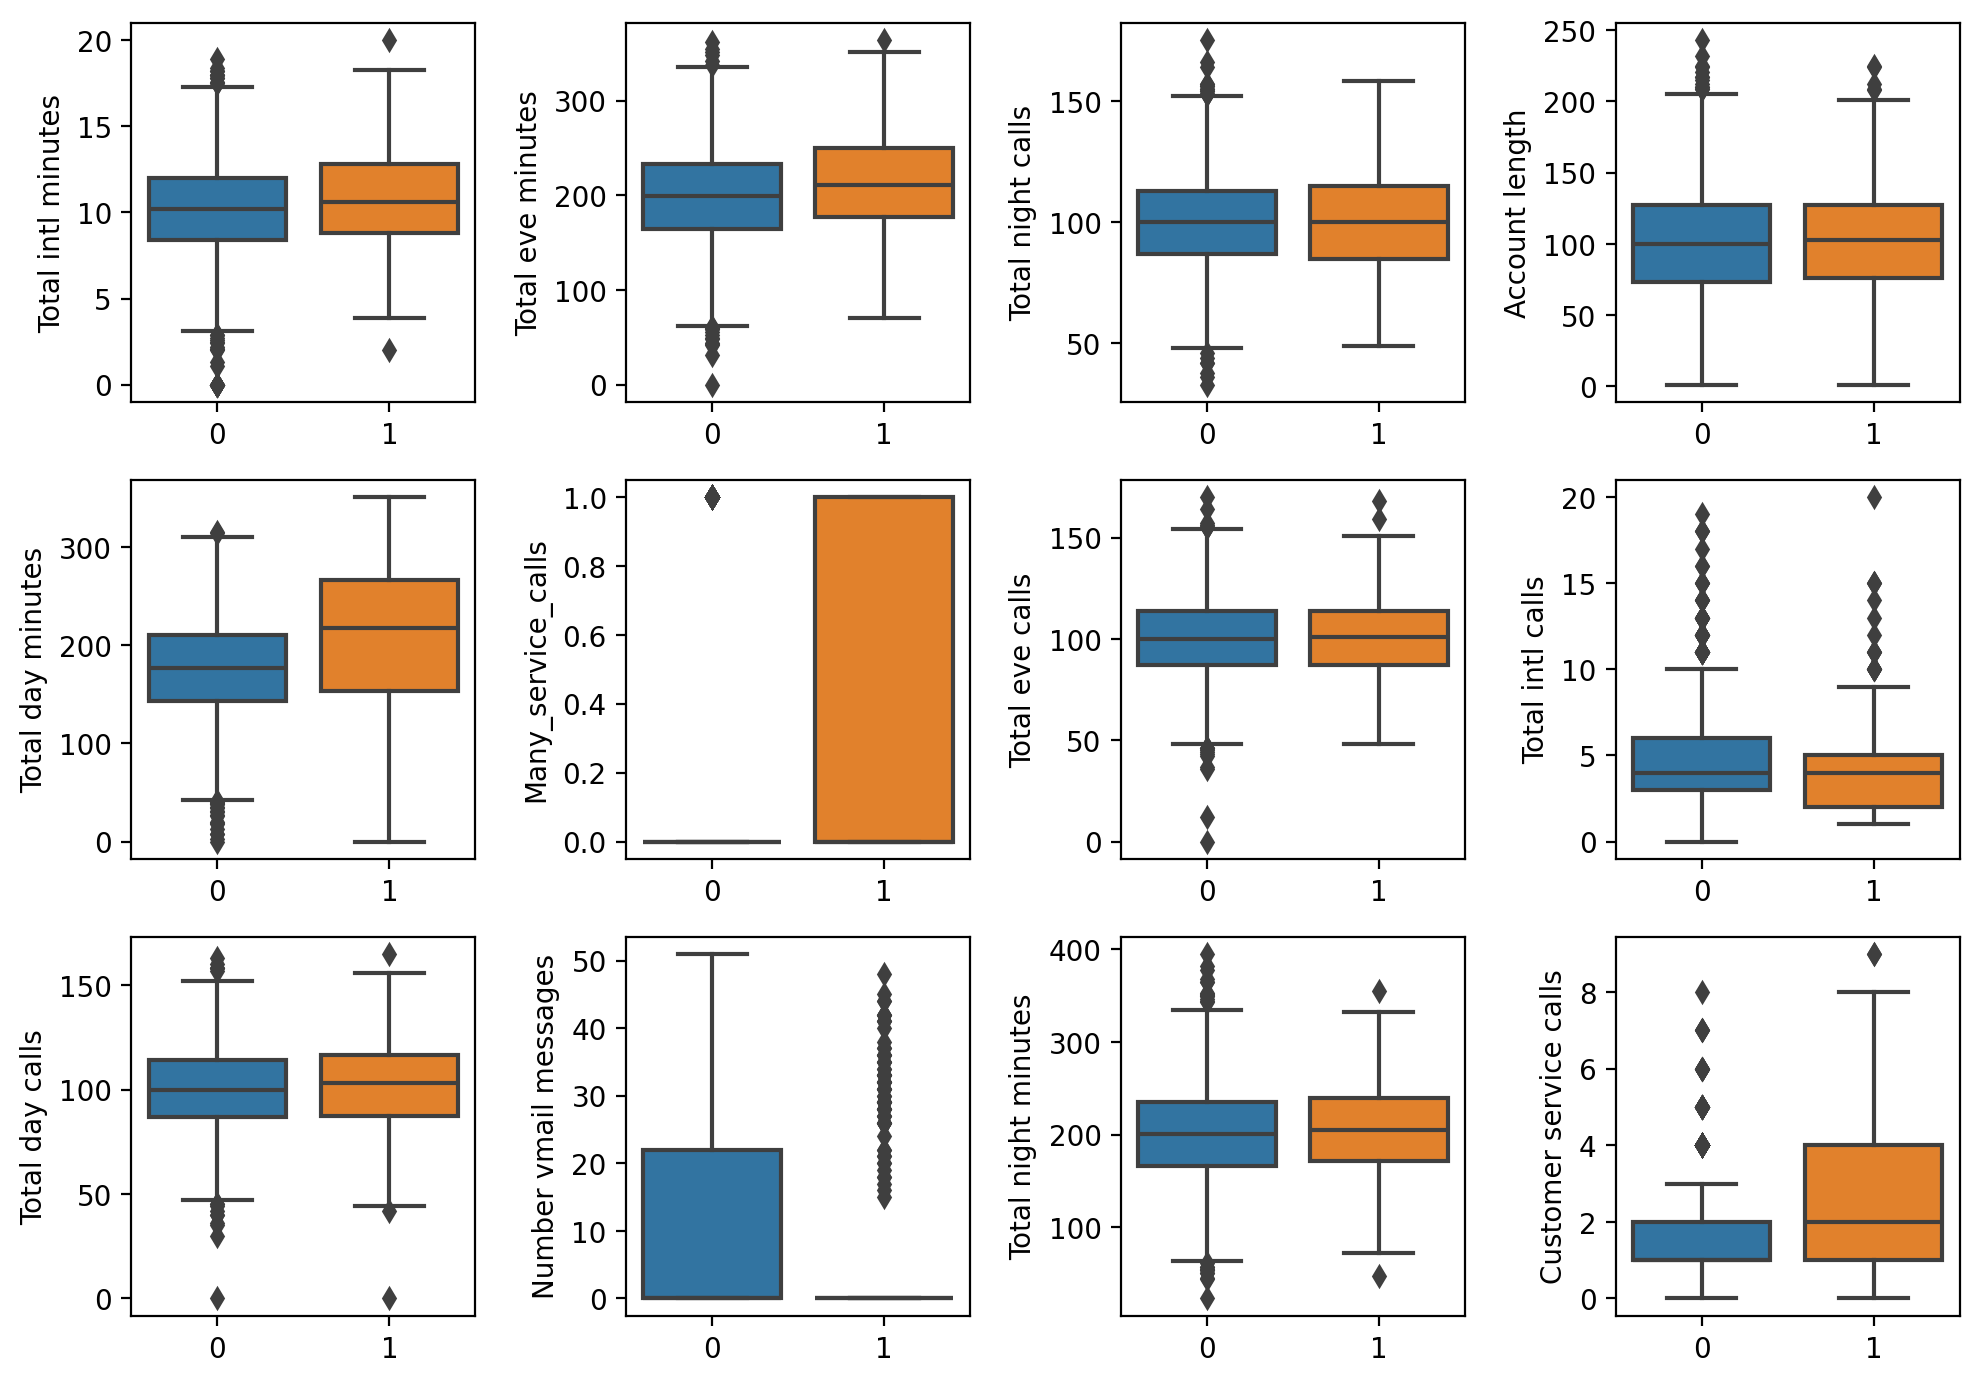

In [61]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
axes = axes.flatten()  # Flatten the axes array to iterate over it

for idx, feat in enumerate(numerical):
    if idx >= len(axes):
        break  # Skip iteration if idx exceeds the number of subplots

    ax = axes[idx]  # Access the single Axes object from the flattened array
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)

fig.tight_layout()

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*. Later in this course, we will learn how to determine feature importance in classification using *Random Forest* or *Gradient Boosting*; there, we will see that the first two features are indeed very important for churn prediction.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.

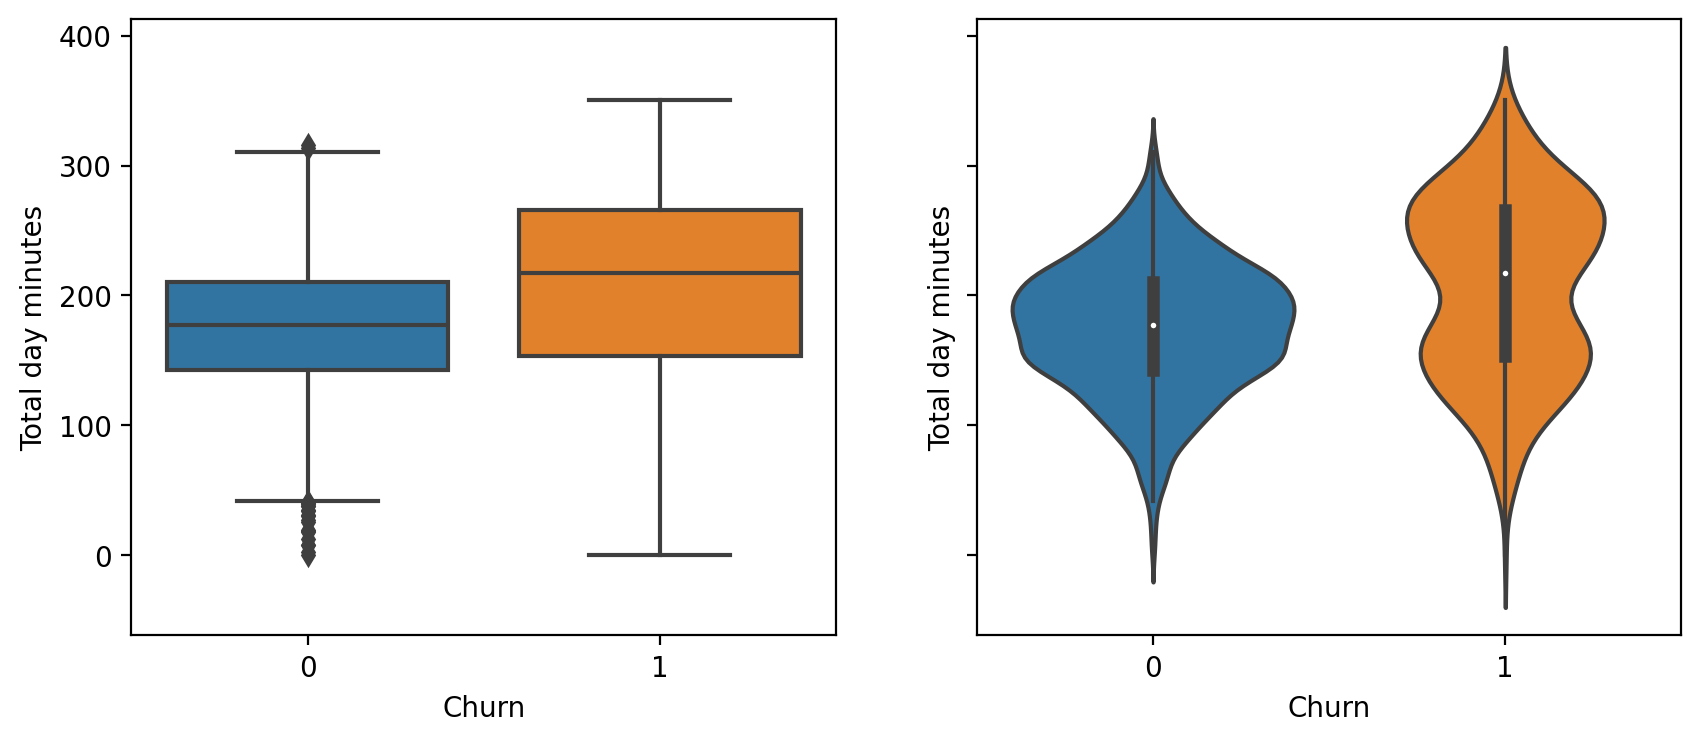

In [62]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:

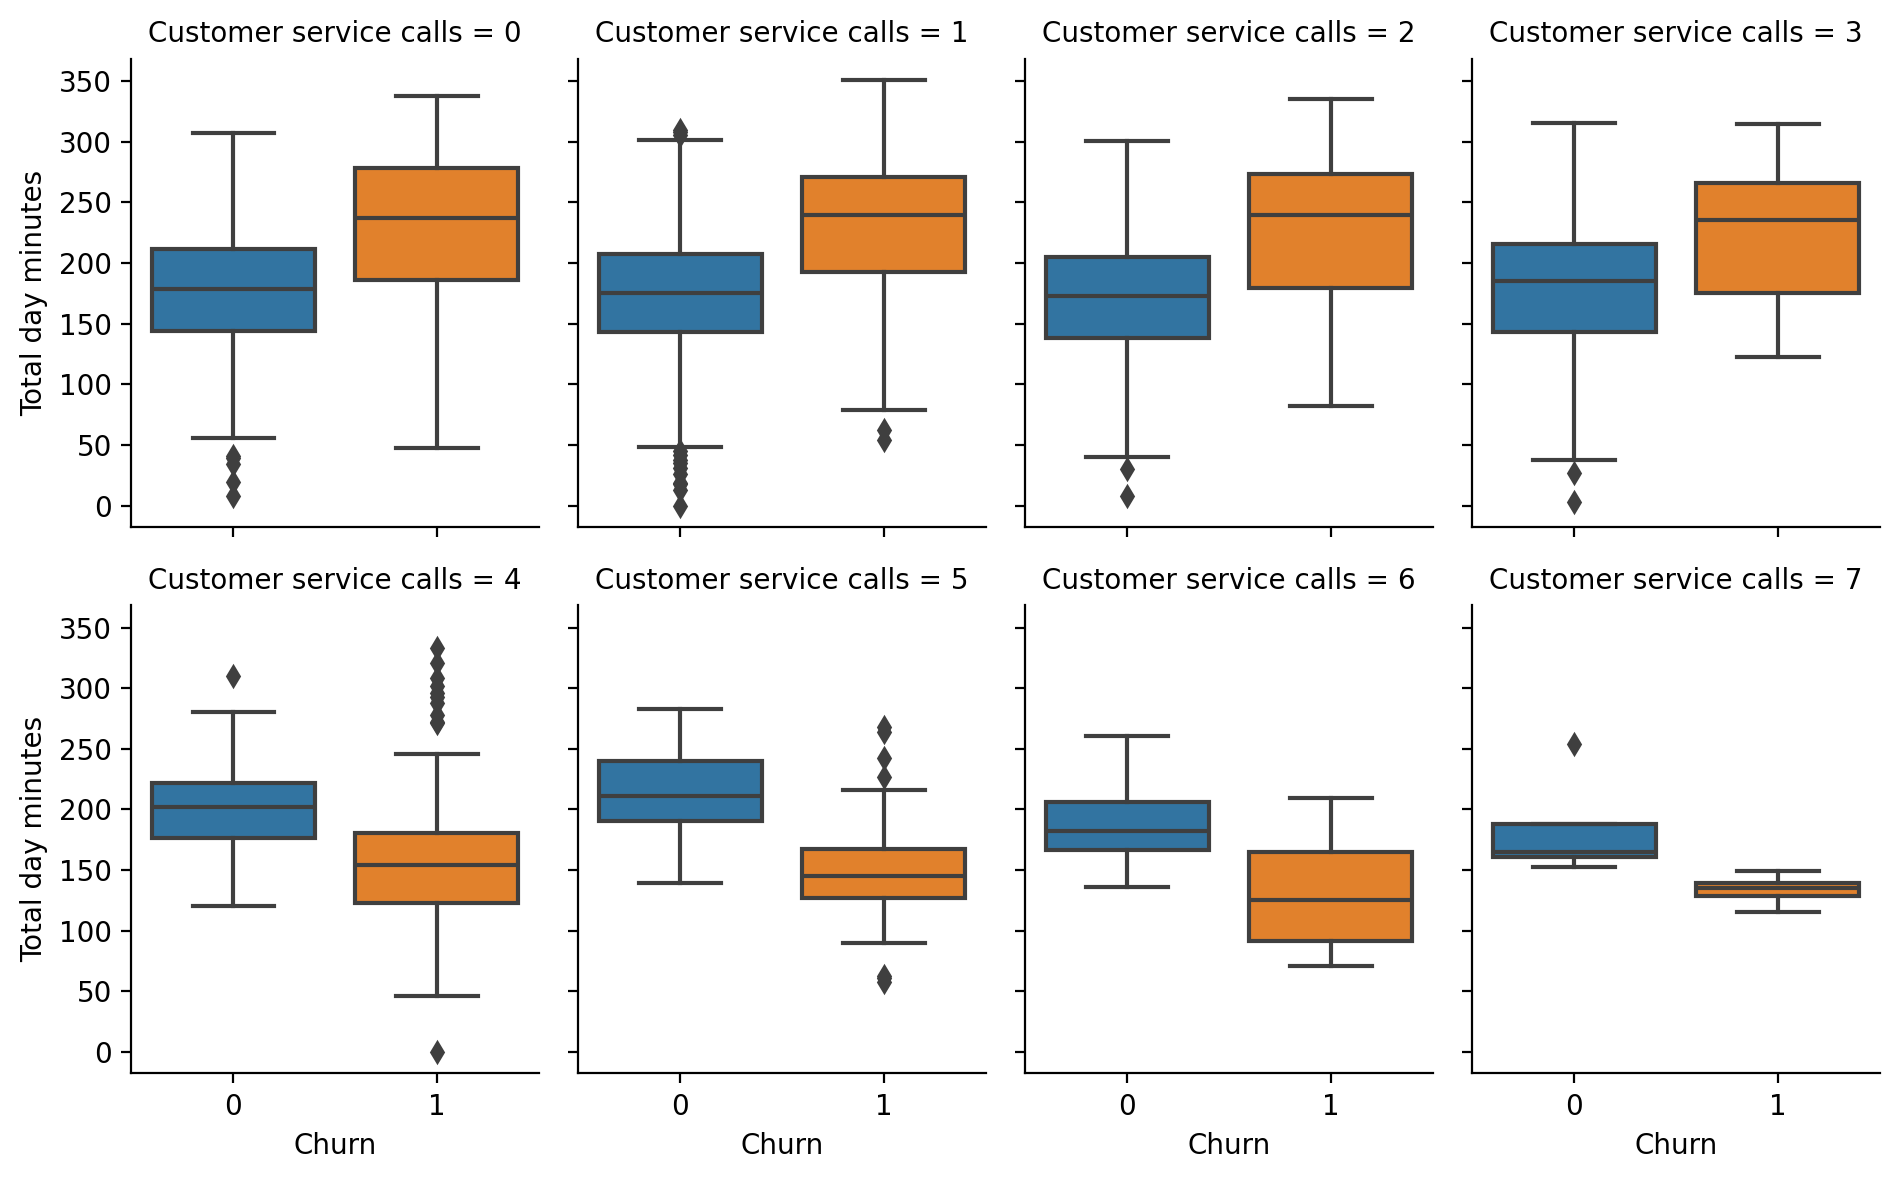

In [63]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

<h2>Categorical vs. Categorical</h2>

As we saw earlier, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

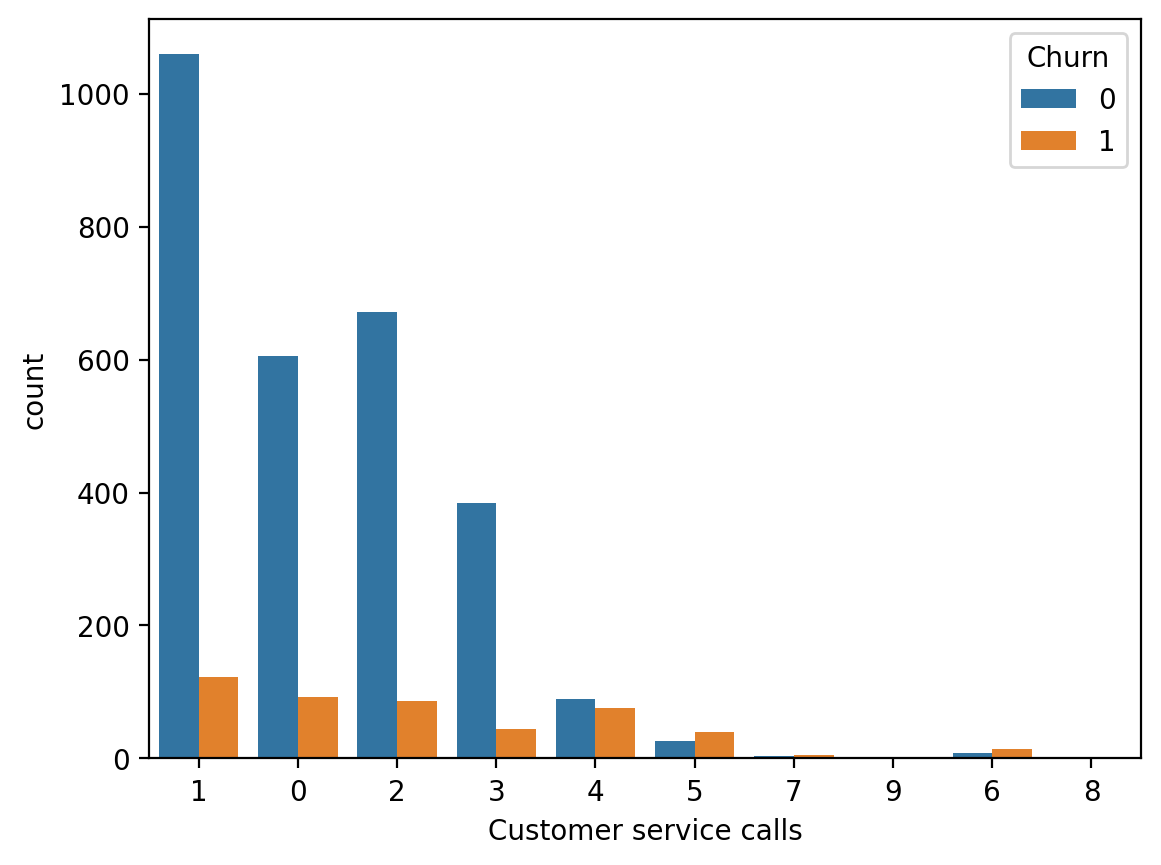

In [64]:
sns.countplot(x="Customer service calls", hue="Churn", data=df.astype(str));

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.

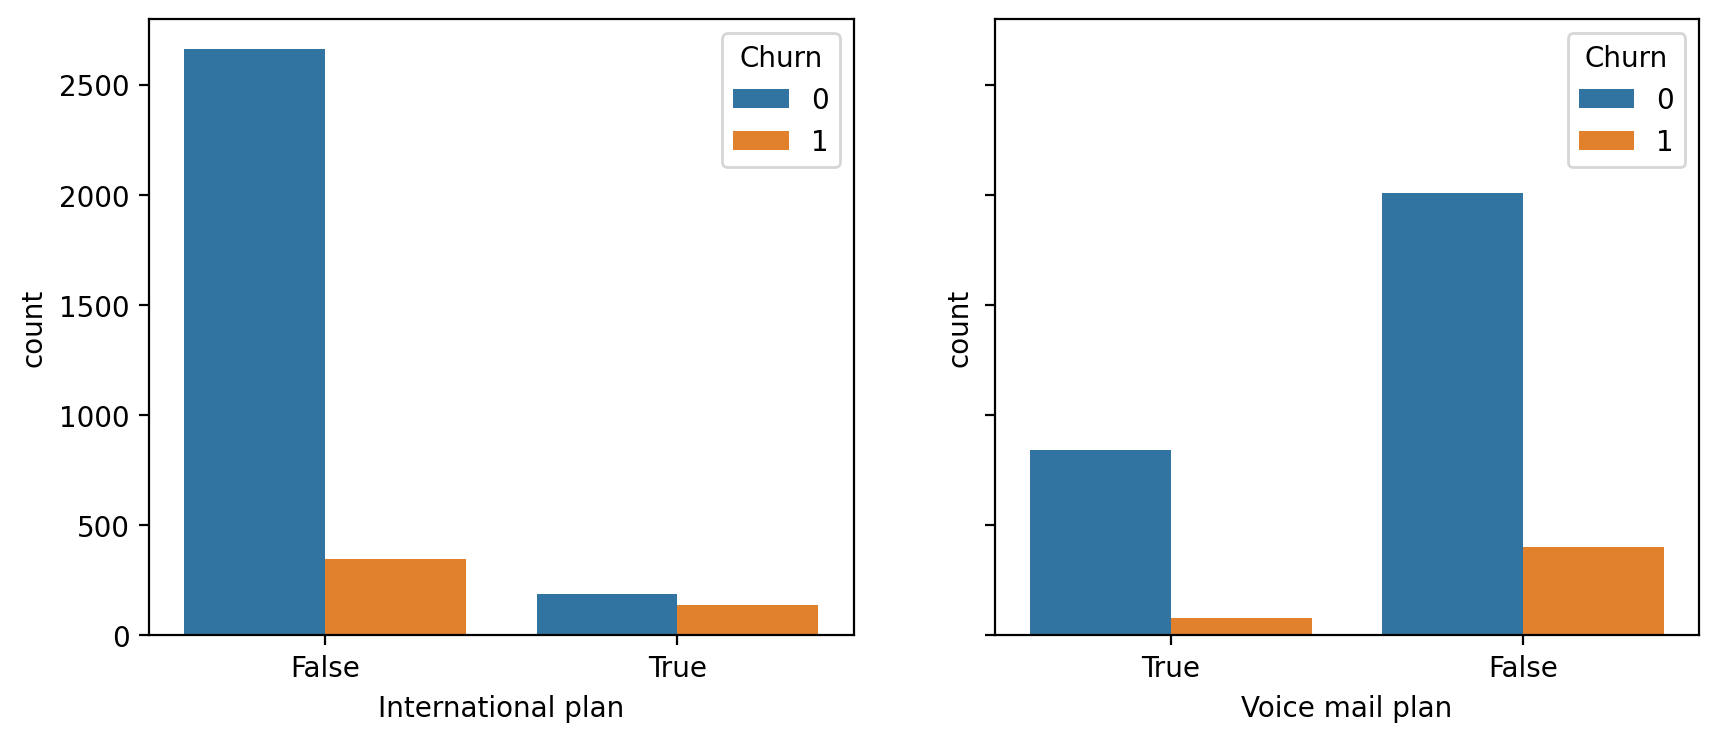

In [65]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df.astype(str), ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df.astype(str), ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

##### Contingency table

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a *contingency table*, also called a *cross tabulation*. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how *Churn* is related to the categorical variable *State* by creating a cross tabulation:

In [66]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
0      49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
1       3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
0      52  71  96  68  
1      14   7  10   9  

[2 rows x 51 columns]

In the case of *State*, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:

In [67]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State    NJ    CA    TX    MD    SC    MI    MS    NV    WA    ME  ...    RI  \
mean   0.26  0.26  0.25  0.24  0.23  0.22  0.22  0.21  0.21  0.21  ...  0.09   

State    WI    IL    NE    LA    IA    VA    AZ    AK    HI  
mean   0.09  0.09  0.08  0.08  0.07  0.06  0.06  0.06  0.06  

[1 rows x 51 columns]

At first glance, it seems that the churn rate in *New Jersey* and *California* are above 25% and less than 6% for Hawaii and Alaska. However, these conclusions are based on too few examples, and our observation could be a mere property of our particular dataset. We can confirm this with the [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) and [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation hypotheses, but this would be beyond the scope of this article.

<h1>Encoding Categorical Data</h1>

Encoding schemes are used to represent categorical variables in a format that can be understood by machine learning algorithms. Since most algorithms work with numerical data, categorical variables need to be transformed into a numerical representation. Here are some common encoding schemes used in Python:

**One-Hot Encoding:** One-hot encoding creates a binary column for each unique category in the categorical variable. Each row is represented by a vector of binary values, where only one value is 1, indicating the category to which that row belongs.

**Target Encoding:** Target encoding replaces each category with the mean or weighted mean of the target variable for that category. This encoding scheme can be useful when the categories have a strong correlation with the target variable.

**Ordinal Encoding:** Ordinal encoding is used when the categories in the categorical variable have a natural ordering or ranking. It assigns a unique numerical value to each category based on its order or rank.

**Binary Encoding:** Binary encoding converts each category into a binary representation, where each category is represented by a unique binary string. This encoding scheme can be useful when dealing with high-cardinality categorical variables.

**Label Encoding:**  Label Encoding is used to encode categorical variables (also known as labels) as numerical values. It assigns a unique numerical label to each category, which can be useful for certain machine learning algorithms that require numerical input features.

In [68]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of the encoder
encoder = LabelEncoder()

# Fit and transform the data
encoded_state = encoder.fit_transform(df[['State']])

# Create a new DataFrame with the encoded column
encoded_df = pd.DataFrame(encoded_state, columns=['State_encoded'])

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'State' column if desired
# df = df.drop('State', axis=1)

In [69]:
# Get the original labels and their corresponding encoded values
original_labels = encoder.classes_
encoded_values = encoder.transform(original_labels)

# Create a dictionary to map original labels to encoded values
label_to_encoded = dict(zip(original_labels, encoded_values))

# Print the mapping of original labels to encoded values
print("Mapping of original labels to encoded values:")
for label, encoded_value in label_to_encoded.items():
    print(f"{label}: {encoded_value}")

Mapping of original labels to encoded values:
AK: 0
AL: 1
AR: 2
AZ: 3
CA: 4
CO: 5
CT: 6
DC: 7
DE: 8
FL: 9
GA: 10
HI: 11
IA: 12
ID: 13
IL: 14
IN: 15
KS: 16
KY: 17
LA: 18
MA: 19
MD: 20
ME: 21
MI: 22
MN: 23
MO: 24
MS: 25
MT: 26
NC: 27
ND: 28
NE: 29
NH: 30
NJ: 31
NM: 32
NV: 33
NY: 34
OH: 35
OK: 36
OR: 37
PA: 38
RI: 39
SC: 40
SD: 41
TN: 42
TX: 43
UT: 44
VA: 45
VT: 46
WA: 47
WI: 48
WV: 49
WY: 50


In [70]:
df[["State","State_encoded"]]

State  State_encoded
0       KS             16
1       OH             35
2       NJ             31
3       OH             35
4       OK             36
...    ...            ...
3328    AZ              3
3329    WV             49
3330    RI             39
3331    CT              6
3332    TN             42

[3333 rows x 2 columns]

<h1>Data Transformation</h1>

Data transformation and scaling are important preprocessing steps in machine learning and data analysis. These techniques are used to ensure that the features in a dataset are on a similar scale and distribution, which can improve the performance and convergence of many machine learning algorithms.

**Data Transformation:**
Data transformation refers to the process of applying mathematical operations or functions to the data to convert it into a more suitable form for analysis or modeling. Some common data transformation techniques include:


**Log Transformation:** Applies the natural logarithm (or other logarithmic function) to the data, which can help to reduce the skewness of a distribution and make it more symmetric.

**Square Root Transformation:** Takes the square root of the data, which can help to reduce the skewness of a distribution and make it more symmetric.
Box-Cox Transformation: A family of power transformations that can help to make the data more normally distributed.

**Binning or Discretization:** Converts continuous numerical features into categorical features by dividing the range of values into bins or intervals.
One-Hot Encoding: Converts categorical features into binary (0/1) columns, where each column represents a single category.

**Dimensionality Reduction:** Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

**Data Scaling:**

Data scaling is the process of transforming the features of a dataset to a common scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms are sensitive to the scale of the input features and can perform poorly if the features have significantly different scales. Some common scaling techniques include:

**Min-Max Scaling (Normalization):** Scales the features to a fixed range, typically [0, 1]. This is done by subtracting the minimum value from each feature and dividing by the range (maximum - minimum).

**Standardization (Z-score Normalization):** Scales the features to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean from each feature and dividing by the standard deviation.

**Robust Scaling:** Similar to standardization, but uses the median and quantiles instead of the mean and standard deviation, making it more robust to outliers.

**Max Absolute Scaling:** Scales the features by dividing each feature by the maximum absolute value, resulting in a range of [-1, 1].

In [71]:
from sklearn.preprocessing import StandardScaler

We will delete the *State* and *Churn* features and convert the values "Yes"/"No" of the binary features into numerical values using [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):

In [72]:
X = df.drop(["Churn", "State"], axis=1)
y = df["Churn"]
X["International plan"] = X["International plan"].replace({"True": 1, "False": 0})
X["Voice mail plan"] = X["Voice mail plan"].replace({"True": 1, "False": 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

In [73]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

<h1>Splitting a Dataset into Train & Test Set</h1>

Splitting a dataset into training and test sets is a common practice in machine learning to evaluate the performance of a model and prevent overfitting. Here's a general overview of the train-test split process:
<ol>
<li><b>Shuffling the Dataset:</b> Before splitting, it's important to shuffle the dataset randomly to ensure that the training and test sets have a similar distribution of data points. This is particularly important if the dataset is ordered in a specific way, such as chronologically or by category.
<li><b>Splitting the Dataset:</b> After shuffling, the dataset is typically split into two subsets: the training set and the test set. A common practice is to use an 80/20 split, where 80% of the data is allocated to the training set, and the remaining 20% is used for the test set. However, the exact split ratio can vary depending on the size of the dataset and the problem domain.
<li><b>Training the Model: </b>The training set is used to train the machine learning model. During training, the model learns the patterns and relationships in the data, adjusting its internal parameters to minimize the error or loss function.
<li><b>Evaluating the Model:</b> Once the model is trained, its performance is evaluated on the test set. The test set, which was not used during training, provides an unbiased estimate of the model's performance on unseen data. Common evaluation metrics include accuracy, precision, recall, F1-score, and others, depending on the problem type (classification, regression, etc.).
</ol>

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=43)

```test_size=0.25:``` This parameter specifies the proportion of the dataset that should be allocated to the testing set. In this case, 25% of the data will be used for testing, and the remaining 75% will be used for training.

```random_state=43:``` This parameter sets the random seed used by the random number generator when splitting the dataset. Setting a random seed ensures that the split is reproducible, meaning that running the code multiple times will produce the same split. In this case, the random seed is set to 43.

<h1>Classification using Machine Learning</h1>


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = pd.DataFrame(model.predict(X_test))

`model = DecisionTreeClassifier():` This line creates an instance of the DecisionTreeClassifier class from scikit-learn. DecisionTreeClassifier is a type of supervised learning algorithm used for classification tasks. It creates a model that predicts the target class based on input features by learning decision rules inferred from the training data.

`model.fit(X_train,y_train):` This line trains the decision tree model on the training data. The fit method takes two main arguments:

`X_train:` The feature matrix containing the training data, where each row represents an observation (sample) and each column represents a feature.
`y_train:` The target vector containing the corresponding labels for the training data. It contains the true class labels for each observation in X_train.
`prediction = pd.DataFrame(model.predict(X_test)):`After the model is trained, this line makes predictions on the test data `(X_test)`. The predict method takes the test data as input and returns the predicted class labels for each observation in` X_test`. These predictions are then stored in a pandas DataFrame called prediction. Each row of the DataFrame represents the predicted class label for a corresponding observation in the test data.

Overall, this code snippet trains a decision tree classifier model using the training data (`X_train` and `y_train`) and then generates predictions for the test data (`X_test`).

<h1>Model Evaluation</h1>

**Performance Metrics:** Calculate various performance metrics to evaluate the model's performance. Common metrics for classification tasks include accuracy, precision, recall, F1-score, ROC curve, and confusion matrix.

**Visualization:** Visualize the performance metrics and other relevant information to gain insights into the model's behavior and performance. Matplotlib, Seaborn, and scikit-learn's built-in visualization functions are commonly used for this purpose.

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [78]:
# Step 3: Calculate Performance Metrics
accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, prediction)
class_report = classification_report(y_test, prediction)

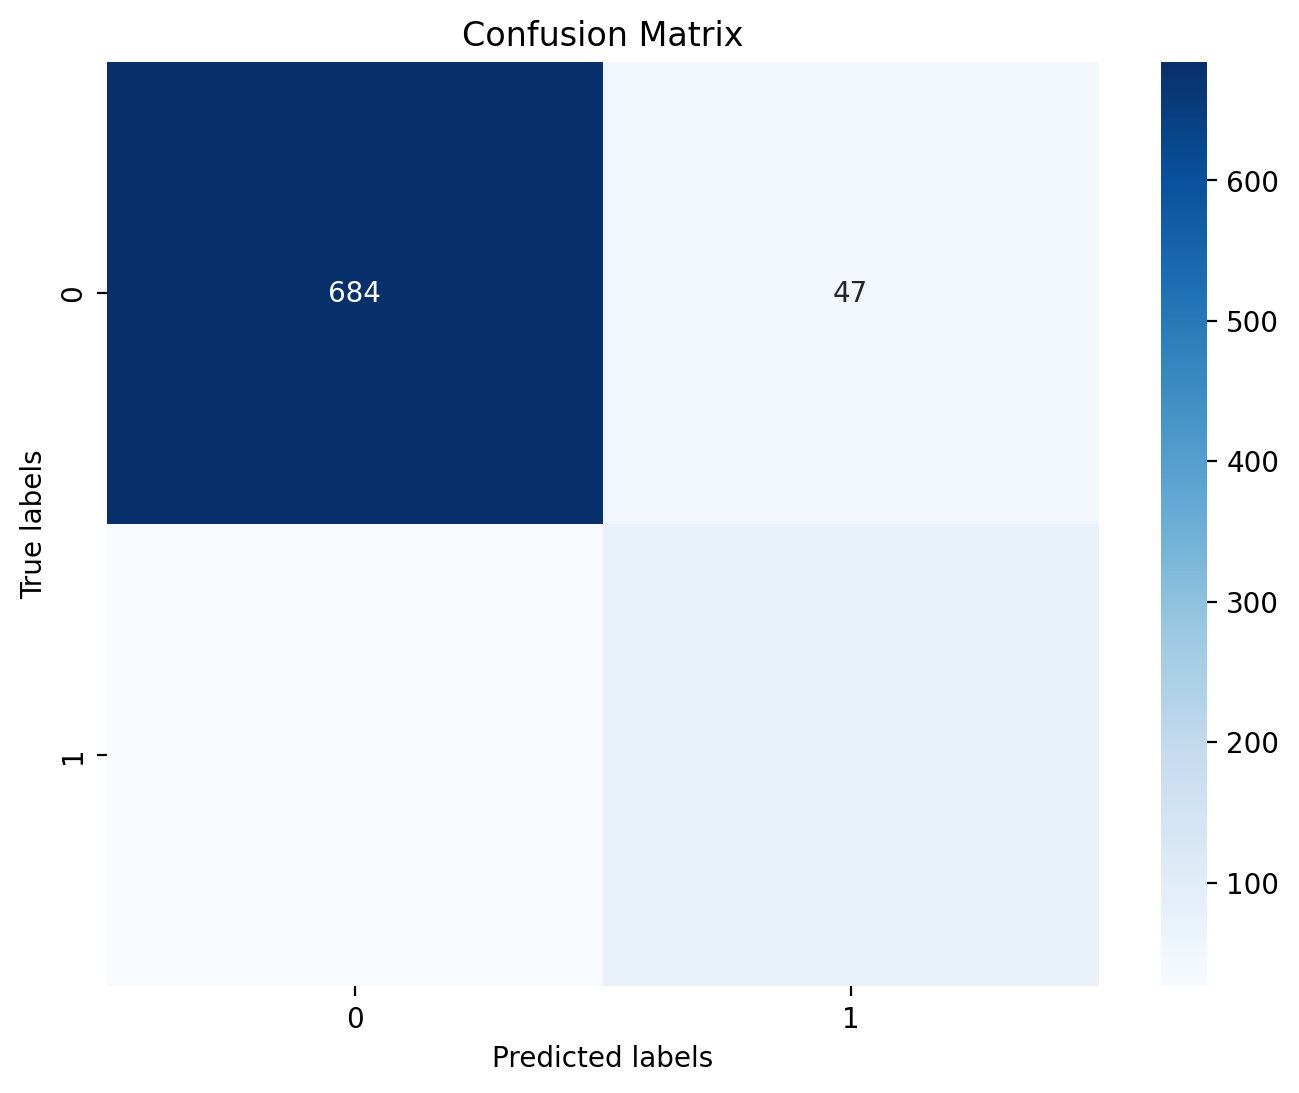

In [79]:
# Step 4: Visualization
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


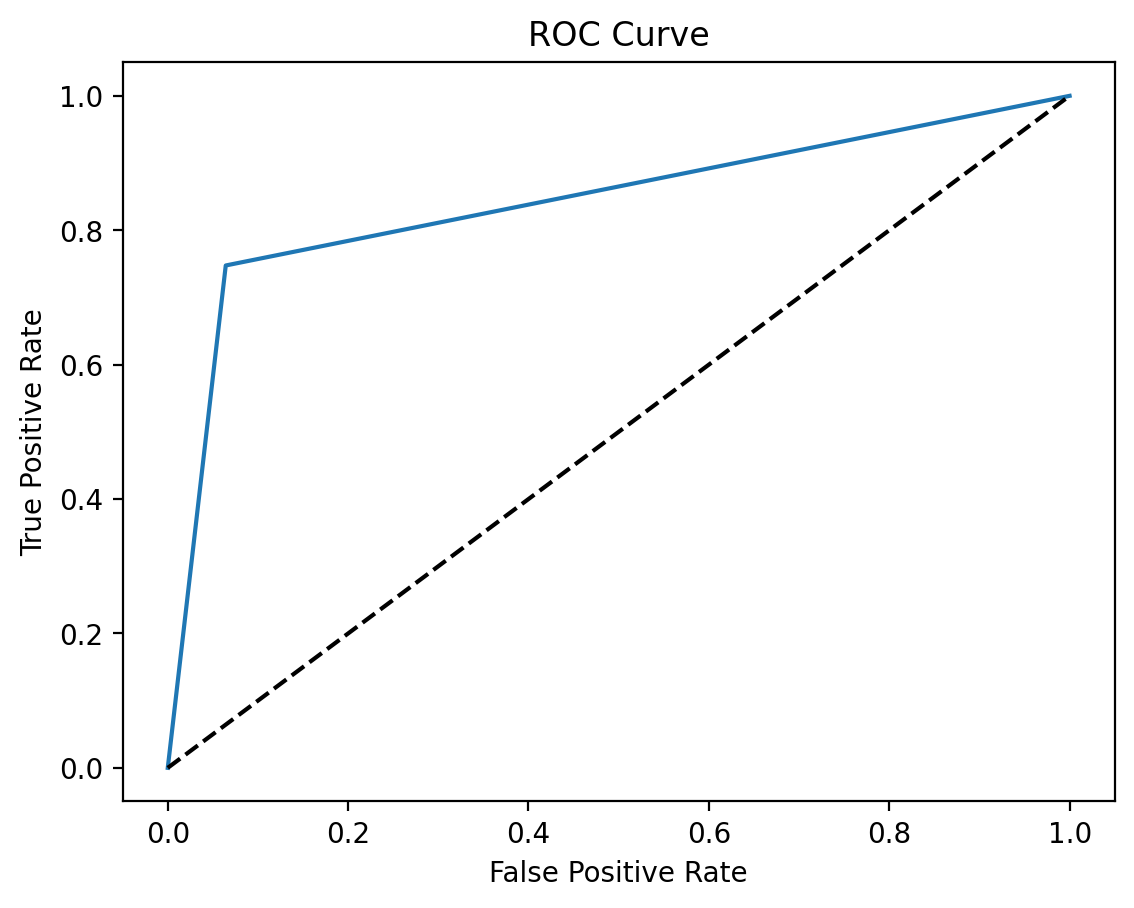

In [80]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [81]:
# Area under ROC curve
roc_auc = roc_auc_score(y_test, prediction)
print('Area under ROC curve:', roc_auc)
print('Model\'s Accuracy: %.2f%%' % (accuracy*100))
# Classification Report
print('Classification Report:\n', class_report)

Area under ROC curve: 0.8416386649489329
Model's Accuracy: 91.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       731
           1       0.62      0.75      0.68       103

    accuracy                           0.91       834
   macro avg       0.79      0.84      0.81       834
weighted avg       0.92      0.91      0.92       834

